In [1]:
# Importing the necessary packages

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

%matplotlib inline

## Sparkling Wines

In [2]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df_1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [3]:
df_1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

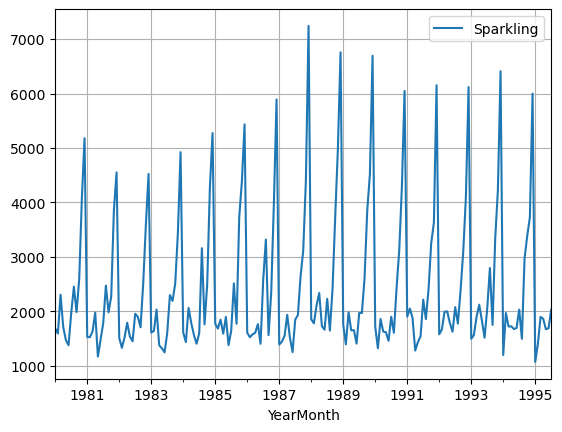

In [4]:
df_1.plot();
plt.grid()

### Method 2:

In [5]:
df_2 = pd.read_csv("Sparkling.csv")

In [6]:
df_2.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

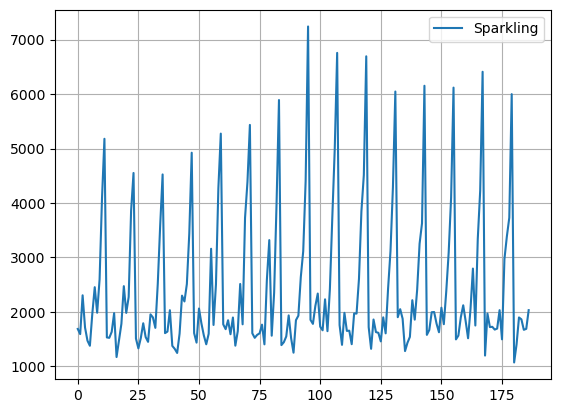

In [7]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [8]:
date = pd.date_range(start='1/1/1980', end='9/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [9]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [10]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

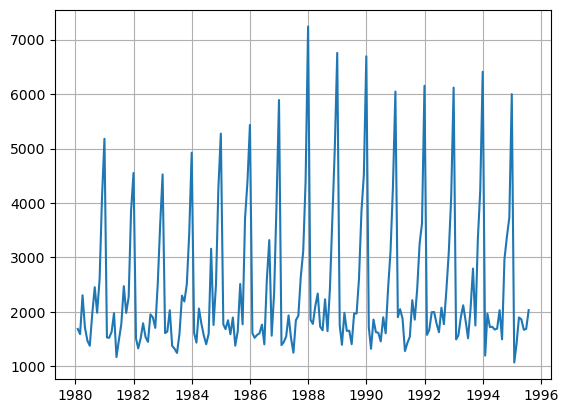

In [11]:
plt.plot(df_2['Time_Stamp'],df_2['Sparkling']);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

We notice that there is an increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality in the data as well.

# Find the mean and median of the monthly wine sales.

In [12]:
df_1.describe().round(2)

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

In [13]:
df_2.describe()

Sparkling                     Time_Stamp
count   187.000000                            187
mean   2402.417112  1987-10-30 19:15:04.812834240
min    1070.000000            1980-01-31 00:00:00
25%    1605.000000            1983-12-15 12:00:00
50%    1874.000000            1987-10-31 00:00:00
75%    2549.000000            1991-09-15 00:00:00
max    7242.000000            1995-07-31 00:00:00
std    1295.111540                            NaN

# Plot a year on year boxplot for the  Sparkling Wine.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

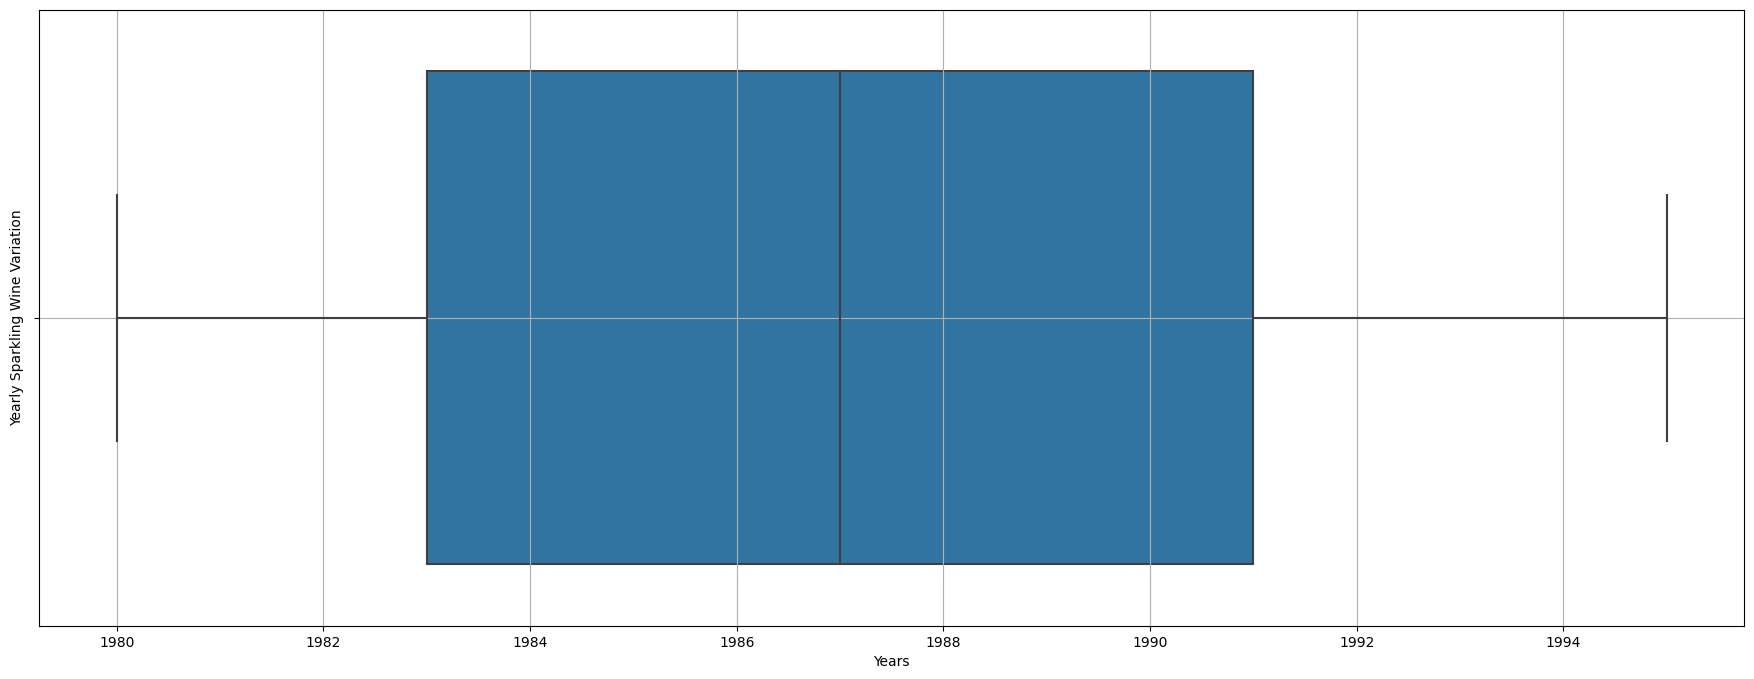

In [14]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_1.index.year, data=df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Variation');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of wine has no outliers .

# Plot a monthly boxplot for the wine sales taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

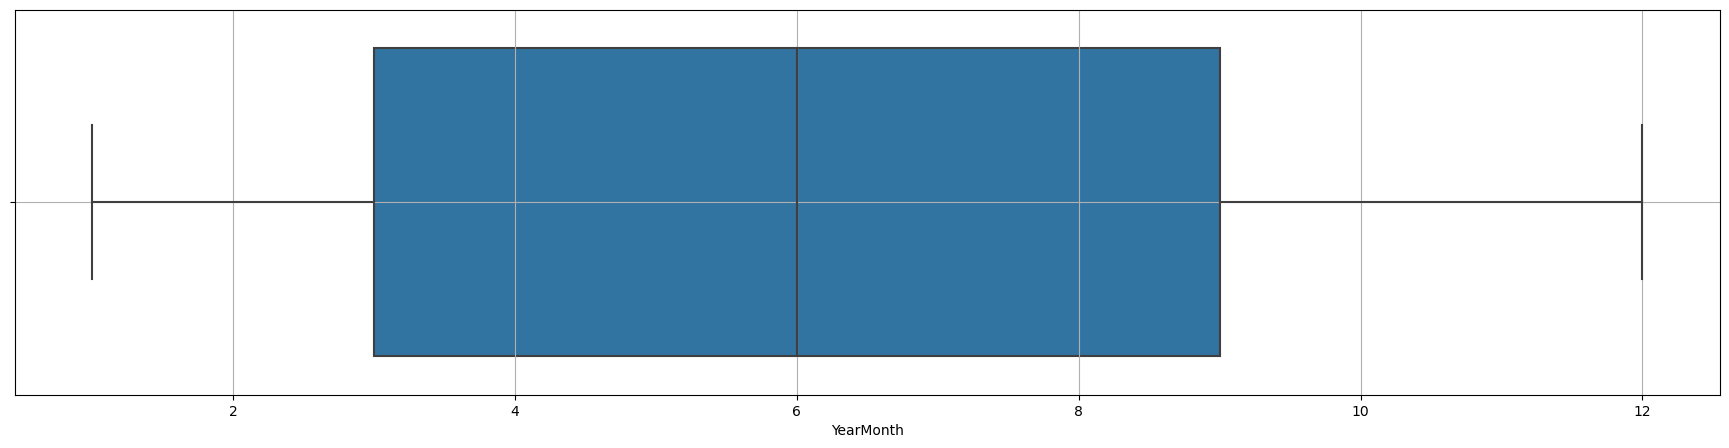

In [15]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df_1.index.month, data=df_1, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly sales for different years does not show any outliers.

# Plot a monthplot of the give Time Series.

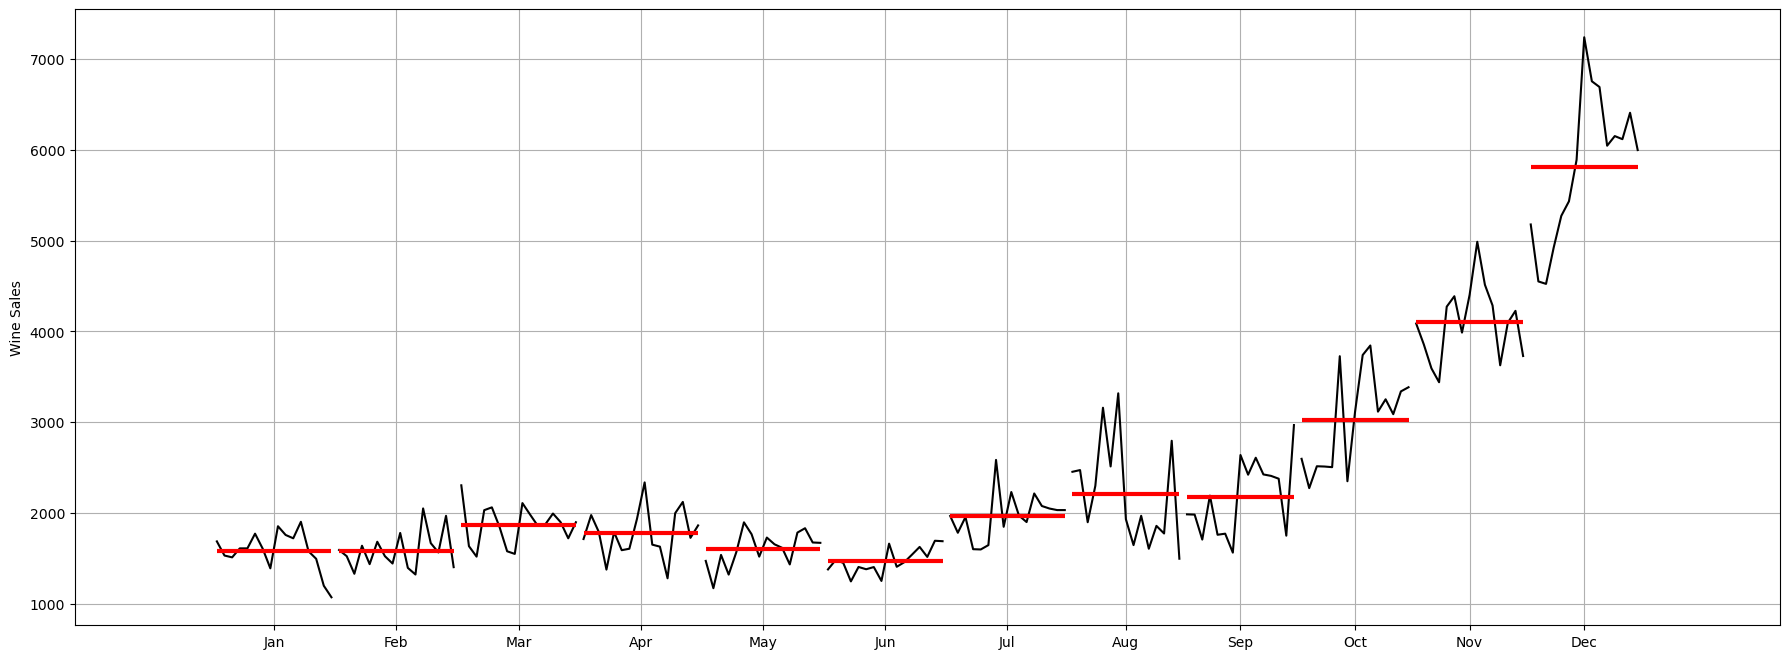

In [16]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine Sales',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [17]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [18]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [19]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Sparkling', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

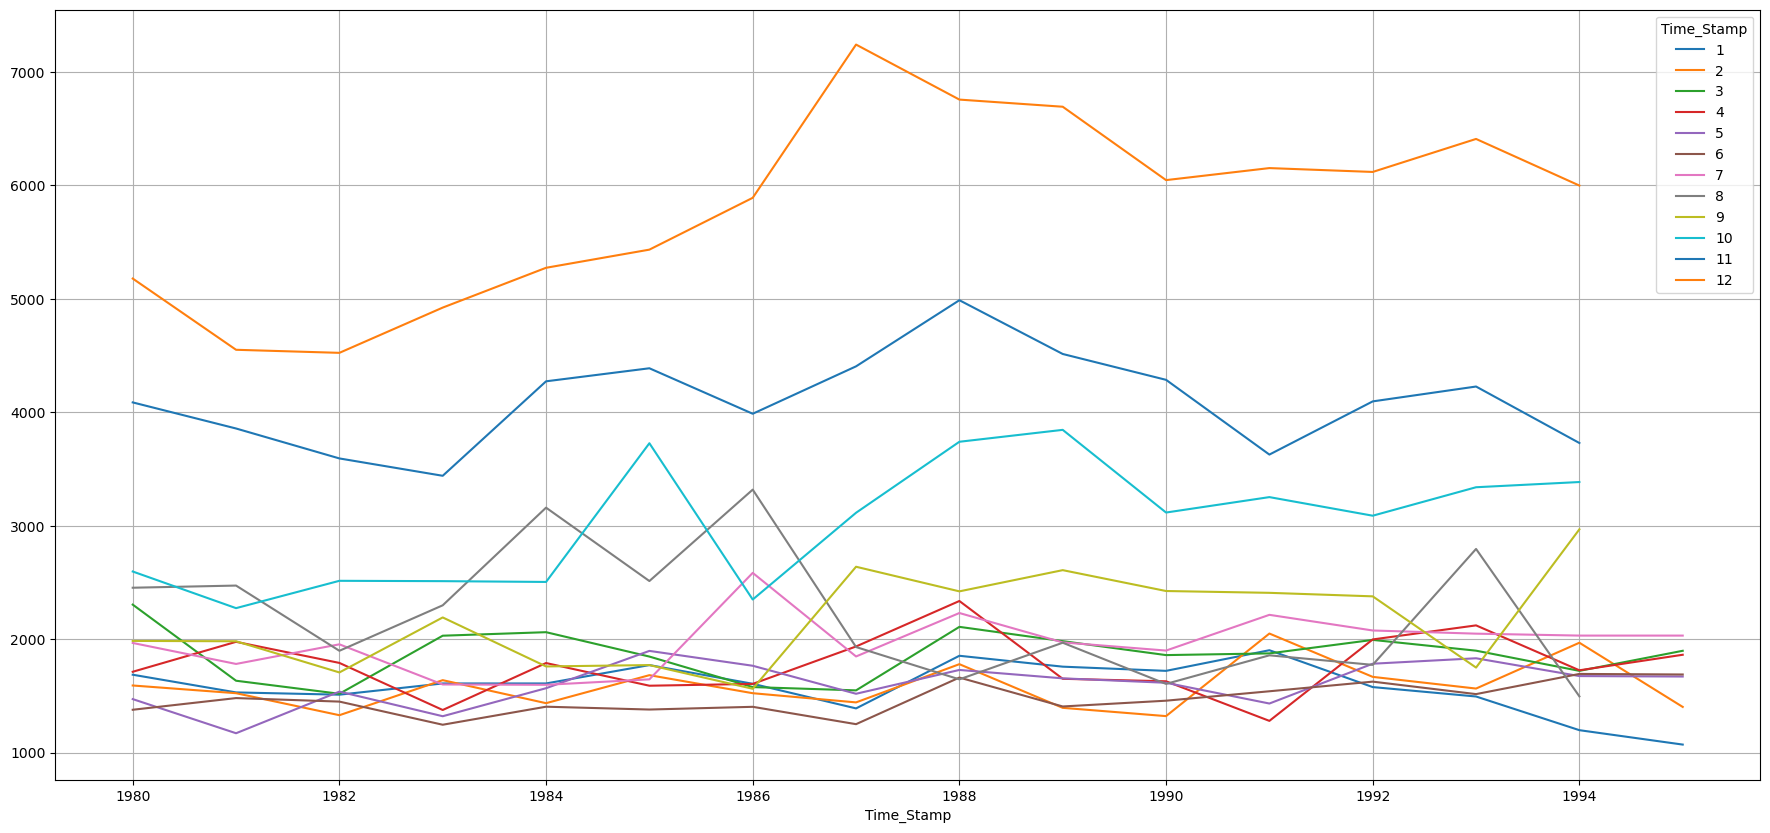

In [20]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

### The concept of resampling will be covered in the video lectures of Second Week as well.

### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [21]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

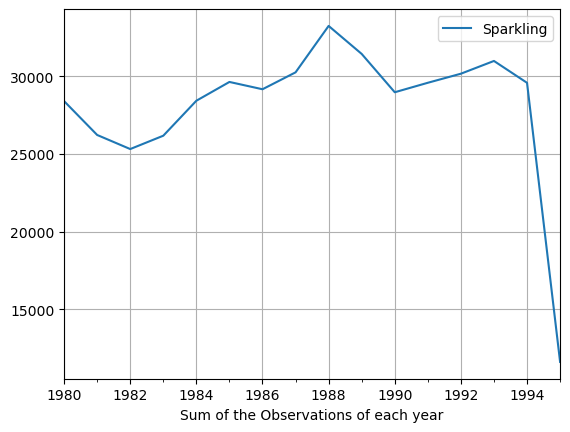

In [22]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [23]:
df_yearly_mean = df_1.resample('Y').mean().round(2)
df_yearly_mean.head()

Sparkling
YearMonth            
1980-12-31    2367.17
1981-12-31    2185.58
1982-12-31    2110.08
1983-12-31    2181.67
1984-12-31    2369.25

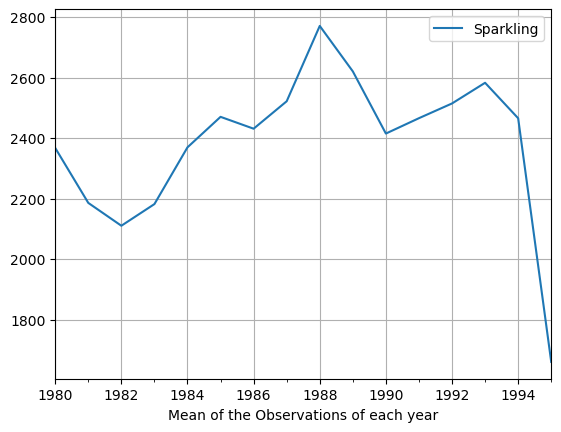

In [24]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

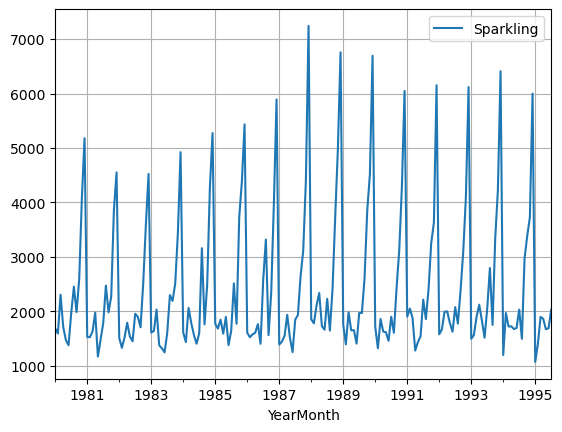

In [25]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [26]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

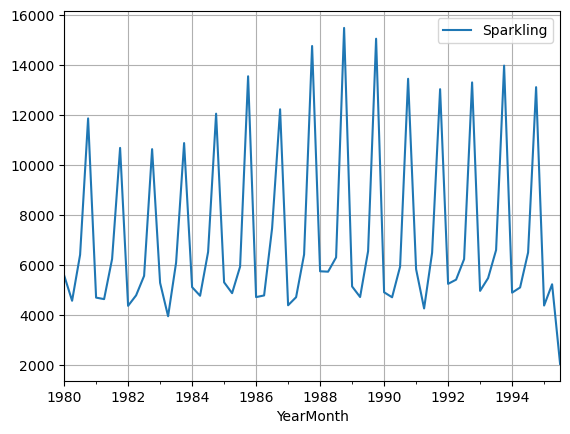

In [27]:
df_quarterly_sum.plot();
plt.grid()

In [28]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

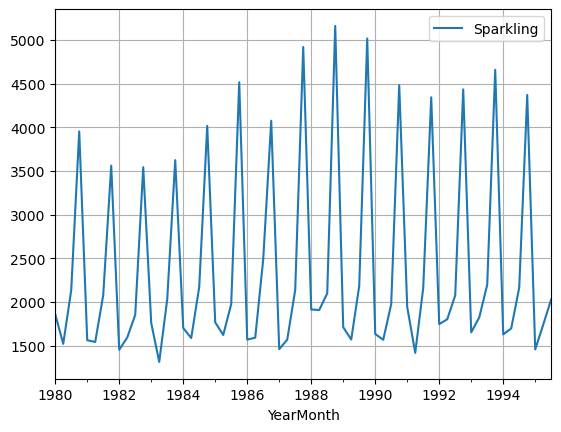

In [29]:
df_quarterly_mean.plot();
plt.grid()

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [30]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0
...               ...
1995-06-27          0
1995-06-28          0
1995-06-29          0
1995-06-30          0
1995-07-01       2031

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

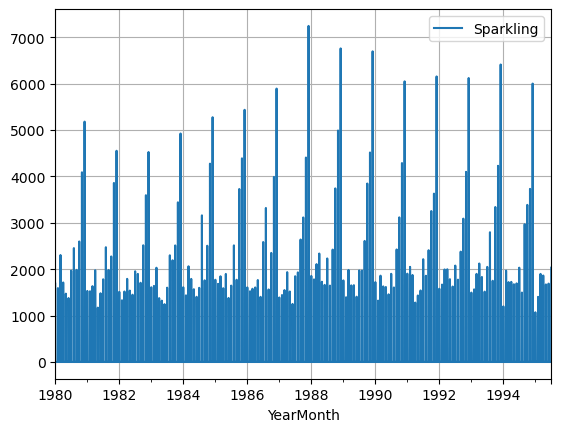

In [31]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

In [32]:
df_daily_mean = df_1.resample('D').mean()
df_daily_mean.head()

Sparkling
YearMonth            
1980-01-01     1686.0
1980-01-02        NaN
1980-01-03        NaN
1980-01-04        NaN
1980-01-05        NaN

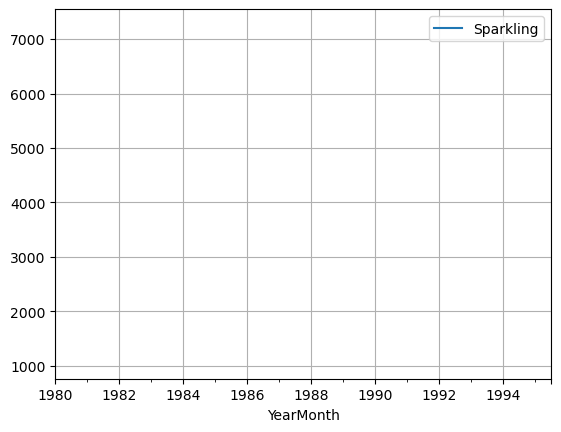

In [33]:
df_daily_mean.plot();
plt.grid()

### Decade Plot

In [34]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

Sparkling
YearMonth            
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

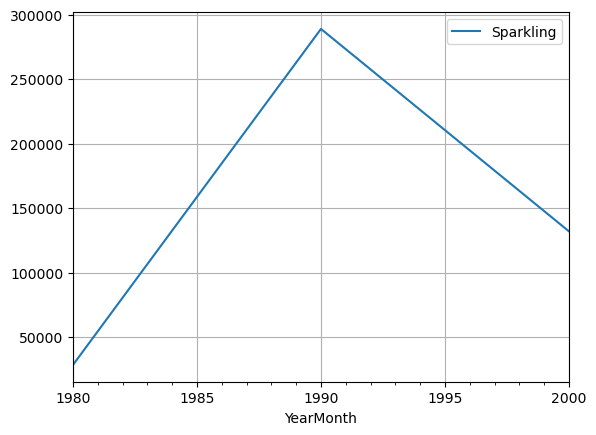

In [35]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Decompose the Time Series

### Additive Model

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

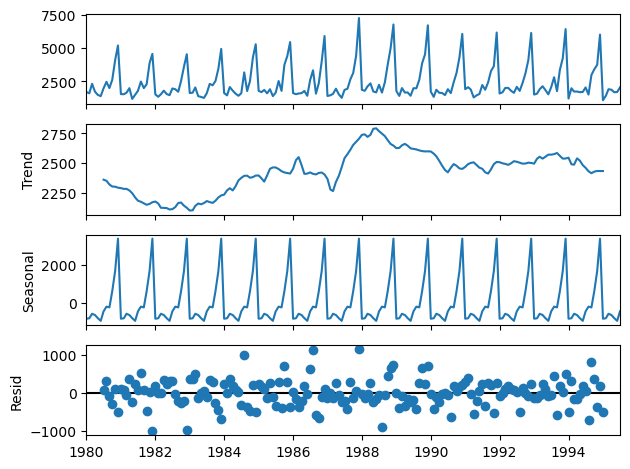

In [37]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [39]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.26
1980-02-01    -830.35
1980-03-01    -592.36
1980-04-01    -658.49
1980-05-01    -824.42
1980-06-01    -967.43
1980-07-01    -465.50
1980-08-01    -214.33
1980-09-01    -254.68
1980-10-01     599.77
1980-11-01    1675.07
1980-12-01    3386.98
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01     70.84
1980-08-01    316.00
1980-09-01    -81.86
1980-10-01   -307.35
1980-11-01    109.89
1980-12-01   -501.78
Name: resid, dtype: float64 



In [40]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2431.50
1980-08-01    2667.33
1980-09-01    2238.68
1980-10-01    1996.23
1980-11-01    2411.93
1980-12-01    1792.02
dtype: float64

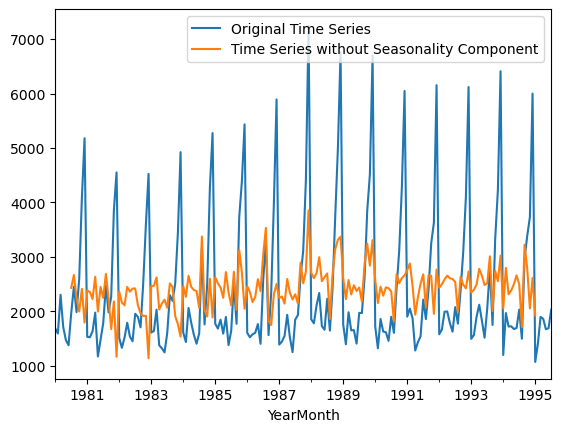

In [41]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Missing Value Handling

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

This particular data does not contain any missing values. Let us try to insert a missing value and then impute it using the methods at our disposal.

In [42]:
df_1.isna().sum()

Sparkling    0
dtype: int64

We see that there is no missing value present.



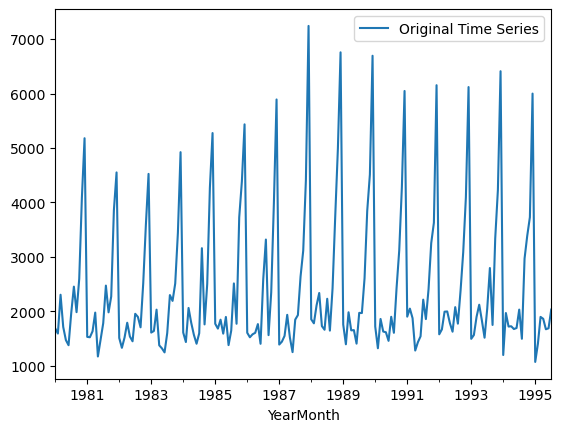

In [43]:
df_1.plot()

plt.legend(["Original Time Series"]);

## Split the data into train and test and plot the training and test data. [30% of the most recent data should be in the test set]

In [44]:
train    =   df_1[0:int(len(df_1)*0.7)] 
test     =   df_1[int(len(df_1)*0.7):]

In [45]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [46]:
from IPython.display import display

In [47]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116

First few rows of Test Data


Sparkling
YearMonth            
1990-11-01       4286
1990-12-01       6047
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

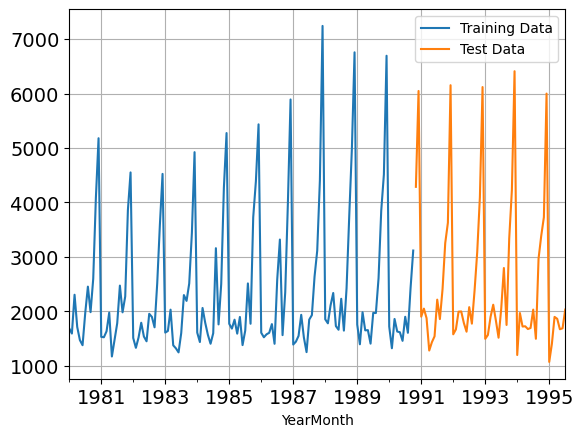

In [48]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [49]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [50]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [51]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130

First few rows of Test Data


Sparkling  time
YearMonth                  
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

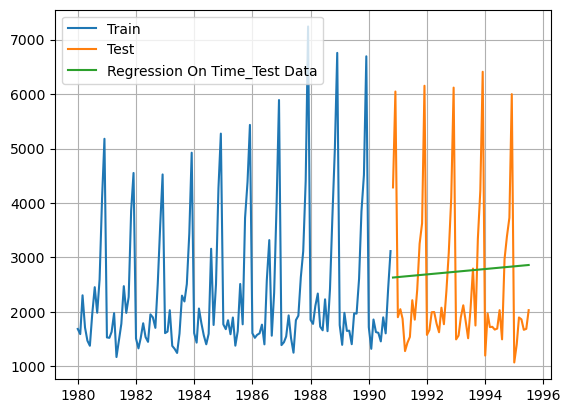

In [55]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [56]:
from sklearn import metrics

### Model Evaluation

In [57]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.438 


In [58]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1392.438305

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
train.tail()

Sparkling
YearMonth            
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116

In [61]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-01    3116
1990-12-01    3116
1991-01-01    3116
1991-02-01    3116
1991-03-01    3116
Name: naive, dtype: int64

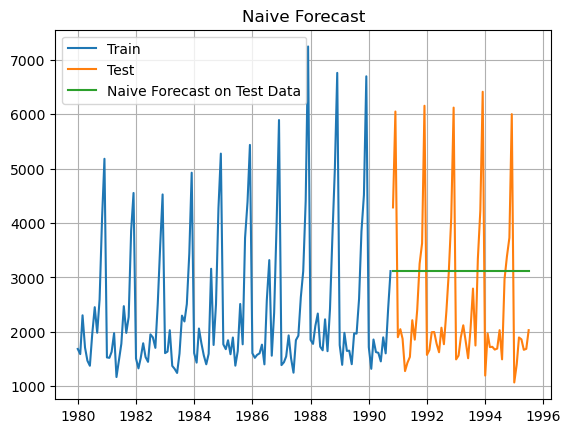

In [62]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [63]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1496.445


In [64]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1392.438305
NaiveModel        1496.444629

## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [65]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [66]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1990-11-01       4286    2361.276923
1990-12-01       6047    2361.276923
1991-01-01       1902    2361.276923
1991-02-01       2049    2361.276923
1991-03-01       1874    2361.276923

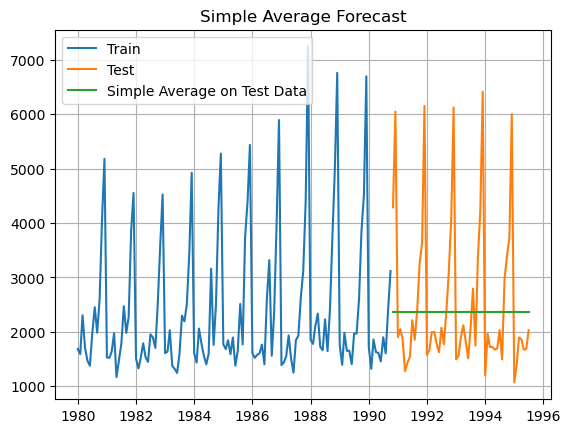

In [67]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [68]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [69]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1392.438305
NaiveModel          1496.444629
SimpleAverageModel  1368.746717

## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [70]:
MovingAverage = df_1.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [71]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

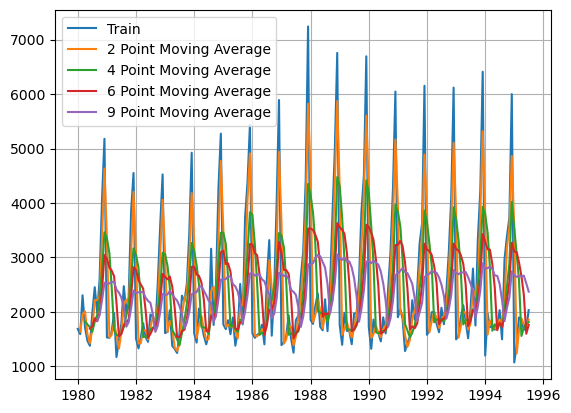

In [72]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [73]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

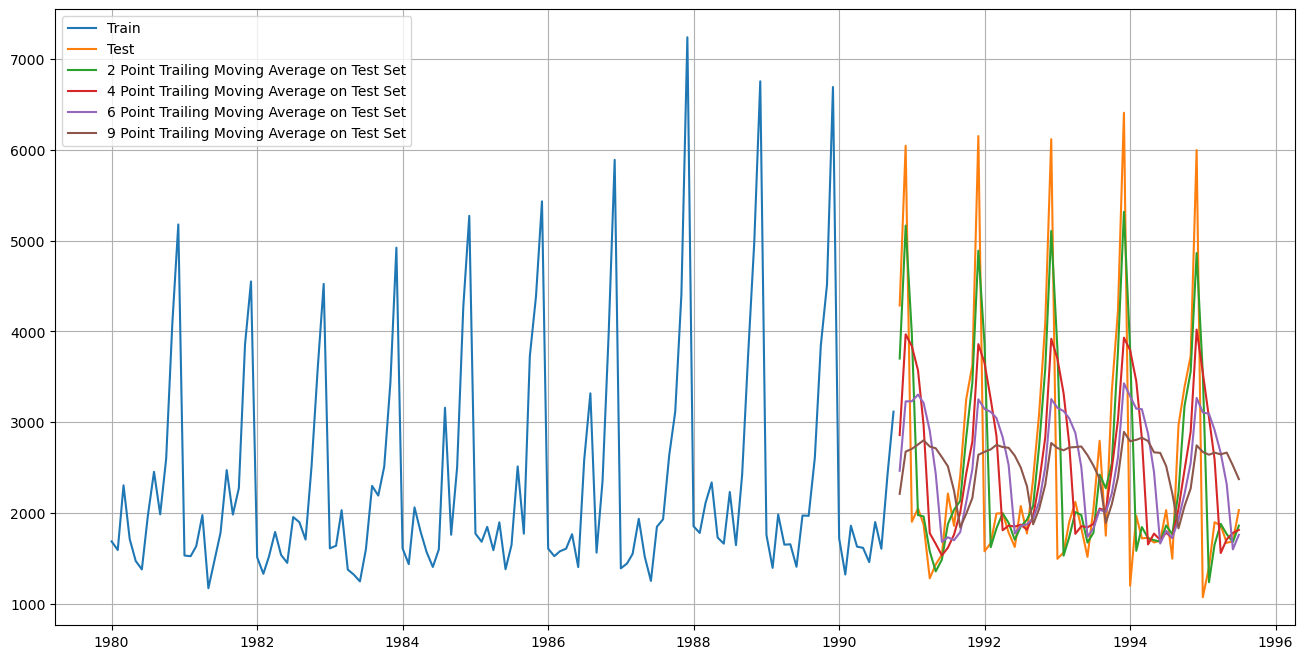

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [75]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [76]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1392.438305
NaiveModel                   1496.444629
SimpleAverageModel           1368.746717
2pointTrailingMovingAverage   811.178937
4pointTrailingMovingAverage  1184.213295
6pointTrailingMovingAverage  1337.200524
9pointTrailingMovingAverage  1422.653281

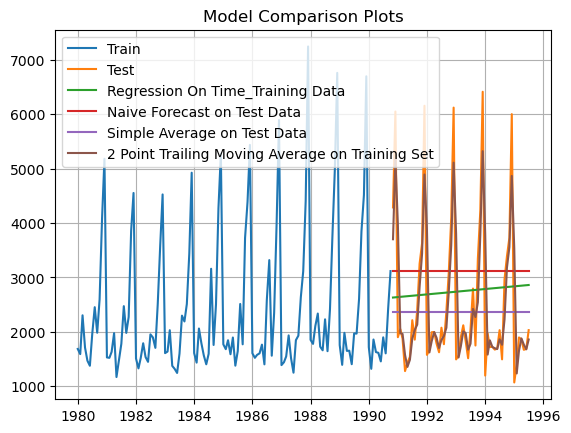

In [77]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

/////////### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [78]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [79]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [80]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.06994372349861198,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1759.087234144848,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [81]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-01    2429.632253
1990-12-01    2429.632253
1991-01-01    2429.632253
1991-02-01    2429.632253
1991-03-01    2429.632253
1991-04-01    2429.632253
1991-05-01    2429.632253
1991-06-01    2429.632253
1991-07-01    2429.632253
1991-08-01    2429.632253
1991-09-01    2429.632253
1991-10-01    2429.632253
1991-11-01    2429.632253
1991-12-01    2429.632253
1992-01-01    2429.632253
1992-02-01    2429.632253
1992-03-01    2429.632253
1992-04-01    2429.632253
1992-05-01    2429.632253
1992-06-01    2429.632253
1992-07-01    2429.632253
1992-08-01    2429.632253
1992-09-01    2429.632253
1992-10-01    2429.632253
1992-11-01    2429.632253
1992-12-01    2429.632253
1993-01-01    2429.632253
1993-02-01    2429.632253
1993-03-01    2429.632253
1993-04-01    2429.632253
1993-05-01    2429.632253
1993-06-01    2429.632253
1993-07-01    2429.632253
1993-08-01    2429.632253
1993-09-01    2429.632253
1993-10-01    2429.632253
1993-11-01    2429.632253
1993-12-01    2429.632253
1994-01-01  

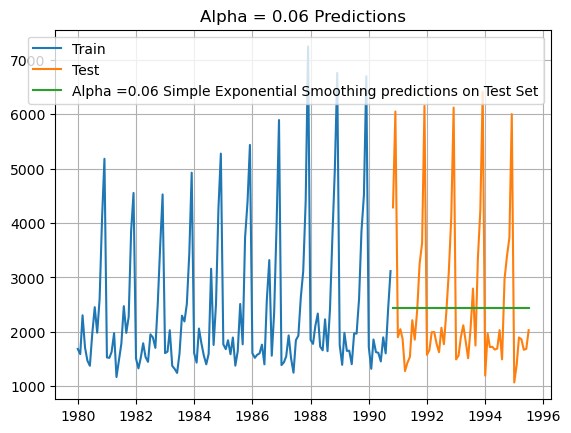

In [82]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.06 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.06 Predictions');

In [83]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [84]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1363.7039148113151
SES RMSE (calculated using statsmodels): 1363.703914811315


In [85]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.06,SES'])
resultsDf

Test RMSE
Alpha=0.06,SES  1363.703915

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [86]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07568138503984535, 'smoothing_trend': 0.07564849865549998, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.5972125731676, 'initial_trend': 6.84852094706126, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [87]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-01    2409.794433
1990-12-01    2393.482643
1991-01-01    2377.170853
1991-02-01    2360.859063
1991-03-01    2344.547273
1991-04-01    2328.235483
1991-05-01    2311.923693
1991-06-01    2295.611903
1991-07-01    2279.300112
1991-08-01    2262.988322
1991-09-01    2246.676532
1991-10-01    2230.364742
1991-11-01    2214.052952
1991-12-01    2197.741162
1992-01-01    2181.429372
1992-02-01    2165.117582
1992-03-01    2148.805792
1992-04-01    2132.494002
1992-05-01    2116.182212
1992-06-01    2099.870422
1992-07-01    2083.558632
1992-08-01    2067.246842
1992-09-01    2050.935051
1992-10-01    2034.623261
1992-11-01    2018.311471
1992-12-01    2001.999681
1993-01-01    1985.687891
1993-02-01    1969.376101
1993-03-01    1953.064311
1993-04-01    1936.752521
1993-05-01    1920.440731
1993-06-01    1904.128941
1993-07-01    1887.817151
1993-08-01    1871.505361
1993-09-01    1855.193571
1993-10-01    1838.881781
1993-11-01    1822.569990
1993-12-01    1806.258200
1994-01-01  

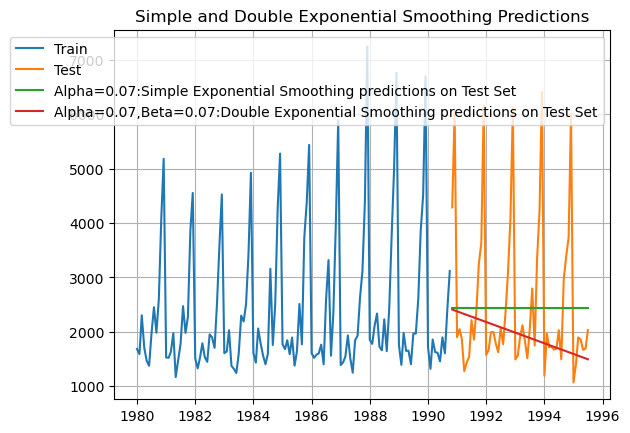

In [88]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.07,Beta=0.07:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [89]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1468.0154088298966


In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.07:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.06,SES         1363.703915
Alpha=1,Beta=0.07:DES  1468.015409

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06871144338895409, 'smoothing_trend': 0.026504879393175, 'smoothing_seasonal': 0.5279825493698512, 'damping_trend': nan, 'initial_level': 2318.8465265203367, 'initial_trend': -0.22585722041700507, 'initial_seasons': array([-694.21346809, -768.46706141, -292.04002651, -517.63405066,
       -880.56455792, -884.72649017, -399.20282583,  128.67427419,
       -329.04495616,  240.07356474, 1673.52542837, 2686.01941002]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [92]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-01    4512.022761
1990-12-01    6590.554415
1991-01-01    1634.403786
1991-02-01    1322.532231
1991-03-01    1818.597200
1991-04-01    1657.713645
1991-05-01    1575.364494
1991-06-01    1394.004132
1991-07-01    1906.888227
1991-08-01    1736.013764
1991-09-01    2420.454068
1991-10-01    3586.345675
1991-11-01    4515.395104
1991-12-01    6593.926758
1992-01-01    1637.776129
1992-02-01    1325.904574
1992-03-01    1821.969543
1992-04-01    1661.085988
1992-05-01    1578.736837
1992-06-01    1397.376475
1992-07-01    1910.260570
1992-08-01    1739.386107
1992-09-01    2423.826411
1992-10-01    3589.718018
1992-11-01    4518.767447
1992-12-01    6597.299101
1993-01-01    1641.148472
1993-02-01    1329.276917
1993-03-01    1825.341886
1993-04-01    1664.458331
1993-05-01    1582.109180
1993-06-01    1400.748818
1993-07-01    1913.632913
1993-08-01    1742.758450
1993-09-01    2427.198754
1993-10-01    3593.090361
1993-11-01    4522.139790
1993-12-01    6600.671444
1994-01-01  

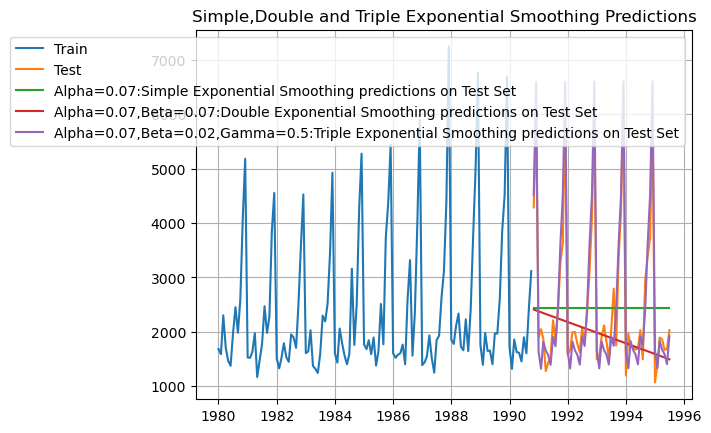

In [93]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.07,Beta=0.07:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.07,Beta=0.02,Gamma=0.5:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [94]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 377.43545275376664


In [95]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.07,Beta=0.02,Gamma=0.5:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.06,SES                      1363.703915
Alpha=1,Beta=0.07:DES               1468.015409
Alpha=0.07,Beta=0.02,Gamma=0.5:TES   377.435453

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [96]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571477801793038, 'smoothing_trend': 0.06489837777631828, 'smoothing_seasonal': 0.37656051925177914, 'damping_trend': nan, 'initial_level': 2356.5416785046673, 'initial_trend': -9.18196615119017, 'initial_seasons': array([0.71187753, 0.6780014 , 0.89663441, 0.79726712, 0.64132661,
       0.64049937, 0.86770501, 1.1135006 , 0.89813412, 1.18645545,
       1.83481782, 2.32894849]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [97]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-11-01    4327.607234
1990-12-01    6208.871973
1991-01-01    1621.599758
1991-02-01    1379.863342
1991-03-01    1791.910257
1991-04-01    1679.443491
1991-05-01    1560.817286
1991-06-01    1371.904508
1991-07-01    1874.426873
1991-08-01    1824.444123
1991-09-01    2288.011133
1991-10-01    3240.919750
1991-11-01    4185.626907
1991-12-01    6004.612585
1992-01-01    1568.105737
1992-02-01    1334.218345
1992-03-01    1732.471160
1992-04-01    1623.580589
1992-05-01    1508.755908
1992-06-01    1326.016805
1992-07-01    1811.555469
1992-08-01    1763.077696
1992-09-01    2210.835993
1992-10-01    3131.294643
1992-11-01    4043.646580
1992-12-01    5800.353196
1993-01-01    1514.611716
1993-02-01    1288.573348
1993-03-01    1673.032063
1993-04-01    1567.717687
1993-05-01    1456.694531
1993-06-01    1280.129102
1993-07-01    1748.684065
1993-08-01    1701.711270
1993-09-01    2133.660853
1993-10-01    3021.669537
1993-11-01    3901.666253
1993-12-01    5596.093808
1994-01-01  

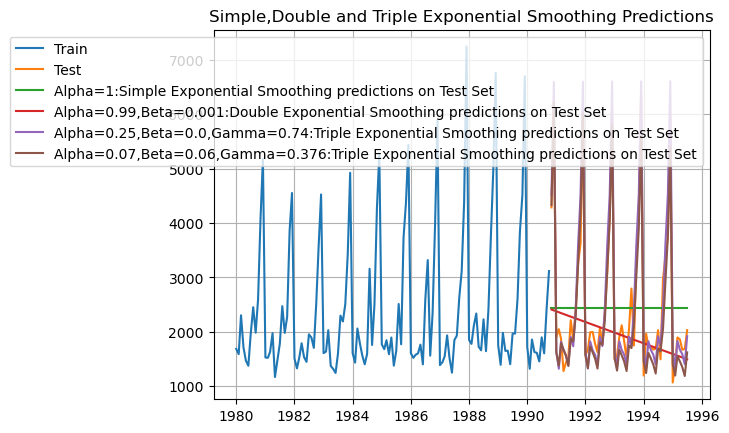

In [98]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.07,Beta=0.06,Gamma=0.376:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [99]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 381.6568734804668


In [100]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.07,Beta=0.06,Gamma=0.376:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.06,SES                        1363.703915
Alpha=1,Beta=0.07:DES                 1468.015409
Alpha=0.07,Beta=0.02,Gamma=0.5:TES     377.435453
Alpha=0.07,Beta=0.06,Gamma=0.376:TES   381.656873

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

## Concept Of Stationarity 
**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- A Time Series is considered to be stationary **when statistical properties such as the variance and (auto) correlation are constant over time.**


- Stationary Time Series allows us to think of the statistical properties of the time series as not changing in time, which enables us to build appropriate statistical models for forecasting based on past data. 


- Stationarity means that the **autocorrelation of lag ‘k’ depends on k, but not on time t.** 

    - <font color='blue'> Let $𝑋_𝑡$  denote the time series at time t.

    - Autocorrelation of lag k is the correlation between $𝑋_{𝑡}$  and $𝑋_{(𝑡−𝑘)}$</font> 




## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [101]:
from statsmodels.tsa.stattools import adfuller

In [102]:
sales_ws = df_1['Sparkling']

In [103]:
dftest = adfuller(df_1['Sparkling'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


 ***the p-value 0.60 is very large, and not smaller than 0.05 and thus is not a stationary series.***

## Check for stationarity of the whole Time Series data.

In [104]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

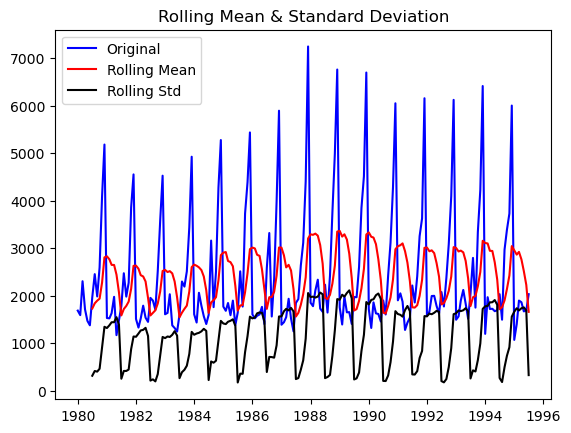

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [105]:
test_stationarity(df_1['Sparkling'])

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


####  Non differenced full data Time series

Text(0, 0.5, 'Wine Sales')

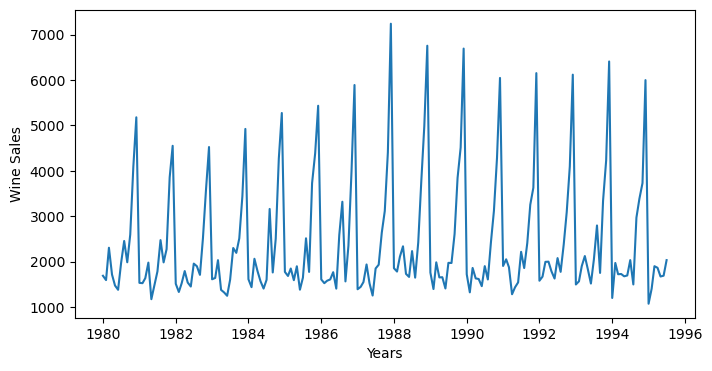

In [106]:
plt.figure(figsize=(8, 4))
plt.plot(df_1['Sparkling'])
plt.xlabel('Years')
plt.ylabel('Wine Sales')

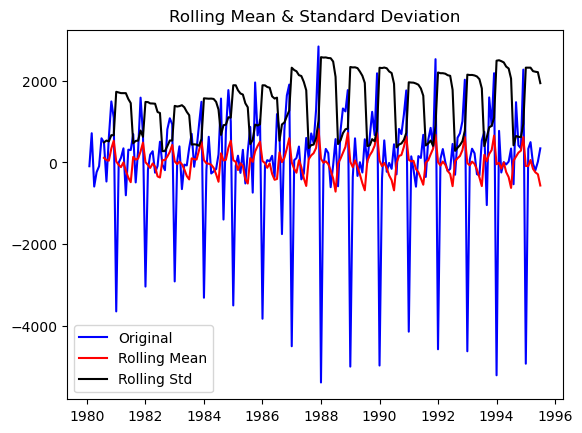

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [107]:
test_stationarity(df_1['Sparkling'].diff().dropna())

We see that at p-value is less than 0.05 the Time Series is indeed stationary.

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Plot the Autocorrelation function plots on the whole data.

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

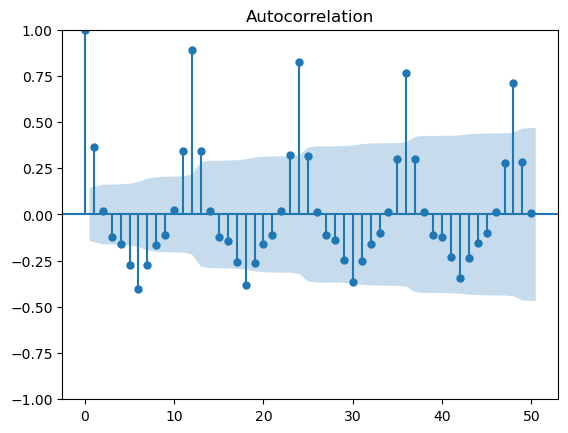

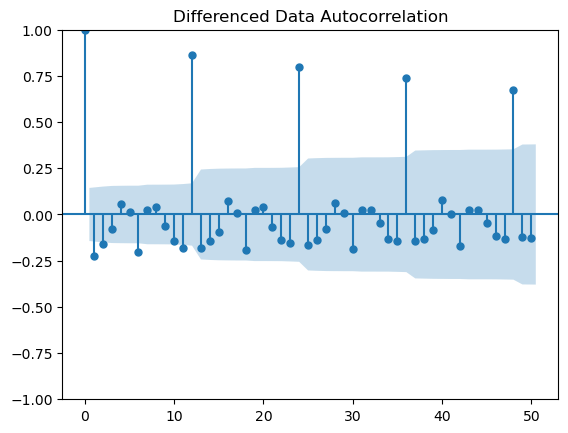

In [109]:
plot_acf(df_1['Sparkling'],lags=50)
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

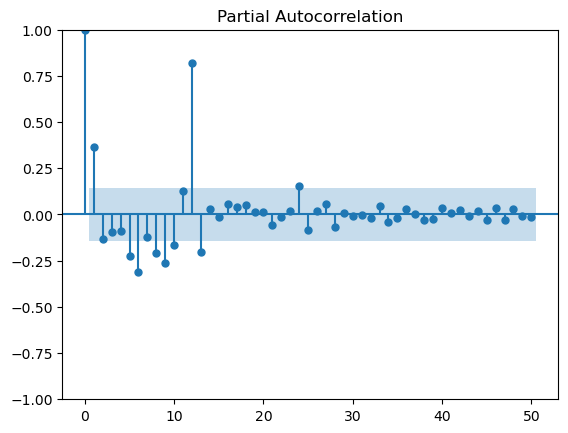

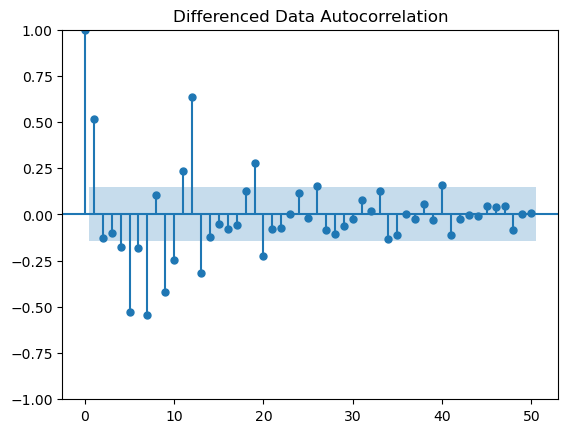

In [110]:
plot_pacf(df_1['Sparkling'],lags=50)
plot_pacf(df_1['Sparkling'].diff(periods=7).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Finding the value of the d parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=1.


### Finding the value of the p parameter
##### we are going to find the optimal value of p which is our number of autoregressive terms. We can find this value by inspecting the PACF plot.The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.



### Finding the value of the q parameter
#####  find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.




### From the above plots, we can say that value of d=1, p=1, q=0

In [111]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [112]:
resultsDf = pd.DataFrame()

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARMA Model



- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [113]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [114]:
p=q= range(1,4)
d= range(0,2)
#Generate all different combinations of p,q with d=0 triplets for ARMA model building

pdq_arma = list(itertools.product(p, range(1),q))
#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [115]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:2206.1421582379553
ARIMA(1, 0, 2) - AIC:2207.1630481805496
ARIMA(1, 0, 3) - AIC:2201.7129676433096
ARIMA(2, 0, 1) - AIC:2197.0844418704846
ARIMA(2, 0, 2) - AIC:2208.120888693483
ARIMA(2, 0, 3) - AIC:2168.1501883772876
ARIMA(3, 0, 1) - AIC:2208.6346758606583
ARIMA(3, 0, 2) - AIC:2196.166079104883
ARIMA(3, 0, 3) - AIC:2171.0344752318433


In [116]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
5  (2, 0, 3)  2168.150188
8  (3, 0, 3)  2171.034475
7  (3, 0, 2)  2196.166079
3  (2, 0, 1)  2197.084442
2  (1, 0, 3)  2201.712968

#### <u>Building ARMA model with best p,q parameter </u>

In [117]:
best_model = ARIMA(train['Sparkling'],order = (2,0,3))
best_results = best_model.fit()

In [118]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1077.075
Date:                Fri, 09 Aug 2024   AIC                           2168.150
Time:                        22:17:51   BIC                           2188.223
Sample:                    01-01-1980   HQIC                          2176.306
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2363.8112    132.652     17.820      0.000    2103.818    2623.804
ar.L1          1.7074      0.046     37.482      0.000       1.618       1.797
ar.L2         -0.9706      0.046    -20.959      0.0

In [119]:
auto_ARMA = ARIMA(train['Sparkling'],order = (2,0,3))

results_auto_ARMA = auto_ARMA.fit()

print(results_auto_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1077.075
Date:                Fri, 09 Aug 2024   AIC                           2168.150
Time:                        22:17:51   BIC                           2188.223
Sample:                    01-01-1980   HQIC                          2176.306
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2363.8112    132.652     17.820      0.000    2103.818    2623.804
ar.L1          1.7074      0.046     37.482      0.000       1.618       1.797
ar.L2         -0.9706      0.046    -20.959      0.0

## Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_auto_ARMA = results_auto_ARMA.forecast(steps=len(test),alpha=0.1)

In [121]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sparkling'],predicted_auto_ARMA,squared=False))
print(rmse)

32.35413028644284


In [122]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARMA(2,0,3)'])

resultsDf=pd.concat([resultsDf,resultsDf2])
resultsDf

RMSE
Auto ARMA(2,0,3)  32.35413

### Manual ARMA

In [123]:
manual_ARMA = ARIMA(train['Sparkling'],order = (1,0,0))

results_manual_ARMA = manual_ARMA.fit()

print(results_manual_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1100.751
Date:                Fri, 09 Aug 2024   AIC                           2207.502
Time:                        22:17:51   BIC                           2216.105
Sample:                    01-01-1980   HQIC                          2210.998
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2361.2769    304.084      7.765      0.000    1765.283    2957.271
ar.L1          0.4018      0.072      5.586      0.000       0.261       0.543
sigma2       1.33e+06    1.5e+05      8.863      0.0

## Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_manual_ARMA = results_manual_ARMA.forecast(steps=len(test),alpha=0.1)

In [125]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sparkling'],predicted_manual_ARMA,squared=False))
print(rmse)

36.832600341067895


In [126]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Manual ARMA Model : ARIMA(1,0,0)'])

resultsDf2

resultsDf = pd.concat([resultsDf,resultsDf2])

In [127]:
resultsDf

RMSE
Auto ARMA(2,0,3)                  32.35413
Manual ARMA Model : ARIMA(1,0,0)  36.83260

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARIMA Model

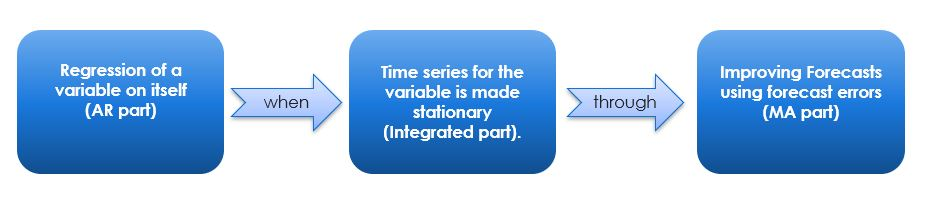

- ARIMA:- **Auto Regressive Integrated Moving Average** is a way of modeling time series data **for forecasting or predicting future data points**. 
- **Improving AR Models by making Time Series stationary through Moving AVerage Forecasts** 


- ARIMA models consist of 3 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **Integrated component: <font color='blue'>Whether the data needs to be differenced/transformed.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

### Auto ARIMA

#### <u>ARIMA Model building to estimate best <font color='blue'>'p' , 'd' , 'q' </font> paramters ( Lowest AIC Approach )</u>

In [128]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [129]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:2206.1421582379553
ARIMA(1, 0, 2) - AIC:2207.1630481805496
ARIMA(1, 0, 3) - AIC:2201.7129676433096
ARIMA(1, 1, 1) - AIC:2196.050085992837
ARIMA(1, 1, 2) - AIC:2194.9596533953163
ARIMA(1, 1, 3) - AIC:2195.939240554724
ARIMA(2, 0, 1) - AIC:2197.0844418704846
ARIMA(2, 0, 2) - AIC:2208.120888693483
ARIMA(2, 0, 3) - AIC:2168.1501883772876
ARIMA(2, 1, 1) - AIC:2193.9749624411756
ARIMA(2, 1, 2) - AIC:2178.1097219544345
ARIMA(2, 1, 3) - AIC:2193.8242890817655
ARIMA(3, 0, 1) - AIC:2208.6346758606583
ARIMA(3, 0, 2) - AIC:2196.166079104883
ARIMA(3, 0, 3) - AIC:2171.0344752318433
ARIMA(3, 1, 1) - AIC:2195.7403855348493
ARIMA(3, 1, 2) - AIC:2191.6278883841496
ARIMA(3, 1, 3) - AIC:2183.470692853024


In [130]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
8   (2, 0, 3)  2168.150188
14  (3, 0, 3)  2171.034475
10  (2, 1, 2)  2178.109722
17  (3, 1, 3)  2183.470693
16  (3, 1, 2)  2191.627888

In [131]:
auto_ARIMA = ARIMA(train['Sparkling'],order = (2,0,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1077.075
Date:                Fri, 09 Aug 2024   AIC                           2168.150
Time:                        22:17:55   BIC                           2188.223
Sample:                    01-01-1980   HQIC                          2176.306
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2363.8112    132.652     17.820      0.000    2103.818    2623.804
ar.L1          1.7074      0.046     37.482      0.000       1.618       1.797
ar.L2         -0.9706      0.046    -20.959      0.0

## Predict on the Test Set using this model and evaluate the model.

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test),alpha=0.1)

In [133]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False))
print(rmse)

32.35413028644284


In [134]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARIMA(2,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

RMSE
Auto ARMA(2,0,3)                  32.35413
Manual ARMA Model : ARIMA(1,0,0)  36.83260
Auto ARIMA(2,0,3)                 32.35413

### Manual ARIMA

In [135]:
manual_ARIMA = ARIMA(train['Sparkling'],order = (1,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1113.569
Date:                Fri, 09 Aug 2024   AIC                           2231.138
Time:                        22:17:55   BIC                           2236.857
Sample:                    01-01-1980   HQIC                          2233.462
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1650      0.103     -1.609      0.108      -0.366       0.036
sigma2      1.857e+06   2.12e+05      8.777      0.000    1.44e+06    2.27e+06
Ljung-Box (L1) (Q):                   0.26   Jarque-

## Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test),alpha=0.1)

In [137]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False))
print(rmse)

38.19333852314318


In [138]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Manual ARIMA Model : ARIMA(1,1,0)'])

resultsDf2

pd.concat([resultsDf,resultsDf2])

RMSE
Auto ARMA(2,0,3)                   32.354130
Manual ARMA Model : ARIMA(1,0,0)   36.832600
Auto ARIMA(2,0,3)                  32.354130
Manual ARIMA Model : ARIMA(1,1,0)  38.193339

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## SARIMA Model 

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**








## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

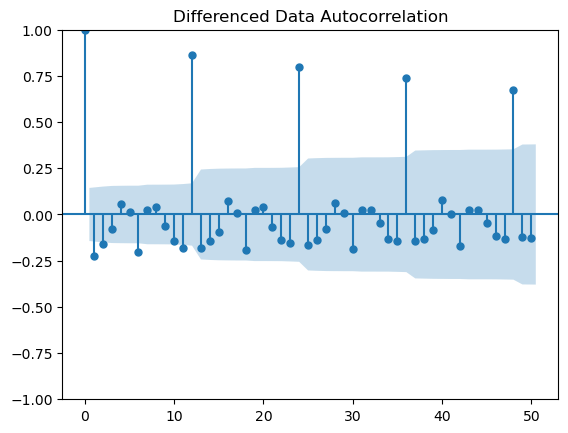

In [139]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

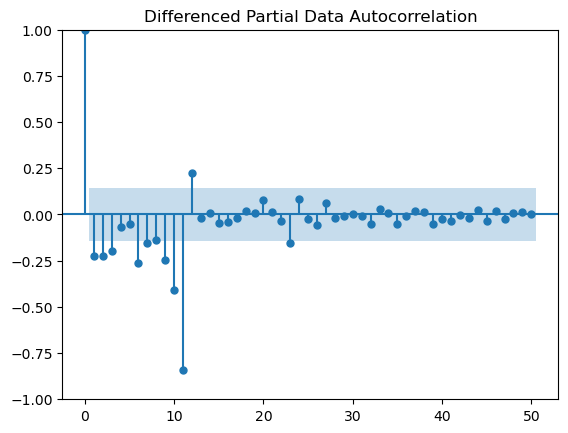

In [140]:
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Partial Data Autocorrelation')
plt.show()

### Finding the value of the d parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=1.


### Finding the value of the p parameter
##### we are going to find the optimal value of p which is our number of autoregressive terms. We can find this value by inspecting the PACF plot.The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.



### Finding the value of the q parameter
#####  find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.


### Finding the value of the D parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=2.


### Finding the value of the P parameter
#####  Number of lags before which we see a peak change in ACF plot.  Our P is 3


### Finding the value of the Q parameter
#####  Number of lags before which we see a peak change in ACF plot.  Our Q is 3

In [141]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1,1,0),
                                seasonal_order=(3, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  130
Model:             SARIMAX(1, 1, 0)x(3, 2, [1, 2, 3], 12)   Log Likelihood                -524.472
Date:                                    Fri, 09 Aug 2024   AIC                           1064.944
Time:                                            22:18:12   BIC                           1082.700
Sample:                                                 0   HQIC                          1071.979
                                                    - 130                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3877      0.127     -3.053      0

In [142]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test),alpha=0.1)

In [143]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

1505.9381831934788


In [144]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual SARIMA(1,1,0),(3, 2, 3, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto ARMA(2,0,3)                      32.354130
Manual ARMA Model : ARIMA(1,0,0)      36.832600
Auto ARIMA(2,0,3)                     32.354130
Manual SARIMA(1,1,0),(3, 2, 3, 12)  1505.938183

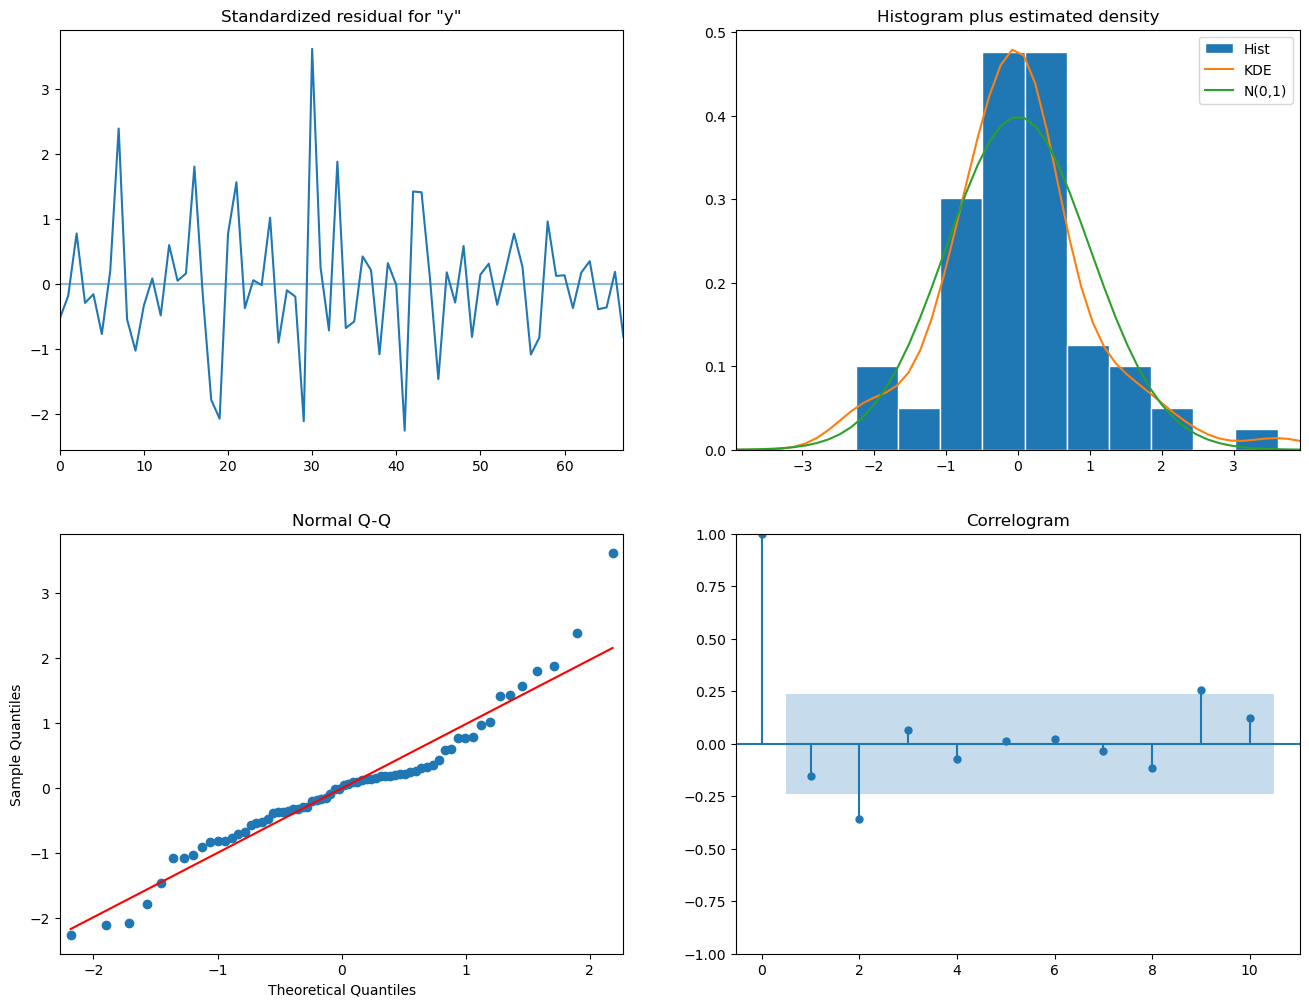

In [145]:
results_manual_SARIMA_12.plot_diagnostics(figsize=(16,12))
plt.show()

### Auto SARIMA

### Setting the seasonality as 12  to estimate parametrs using auto SARIMA model.

In [146]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [148]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801496982
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017311135
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.2950161665542
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913876064
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.281534210686
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363275
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547329068
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.0623659586895
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008422
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1658.7576059597727
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049141737
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1704.8427340699297
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1536.3191140063623
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.2496935599286
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.9149381087552
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1536.4110103352739
SARIMA(0, 1,

In [149]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737956
50  (1, 1, 2)  (1, 0, 2, 12)  1521.949483
80  (2, 1, 2)  (2, 0, 2, 12)  1523.217831
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707308

In [150]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.869
Date:                            Fri, 09 Aug 2024   AIC                           1521.738
Time:                                    22:18:51   BIC                           1542.738
Sample:                                         0   HQIC                          1530.241
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6465      0.268     -2.415      0.016      -1.171      -0.122
ma.L1          0.2835      0.300   

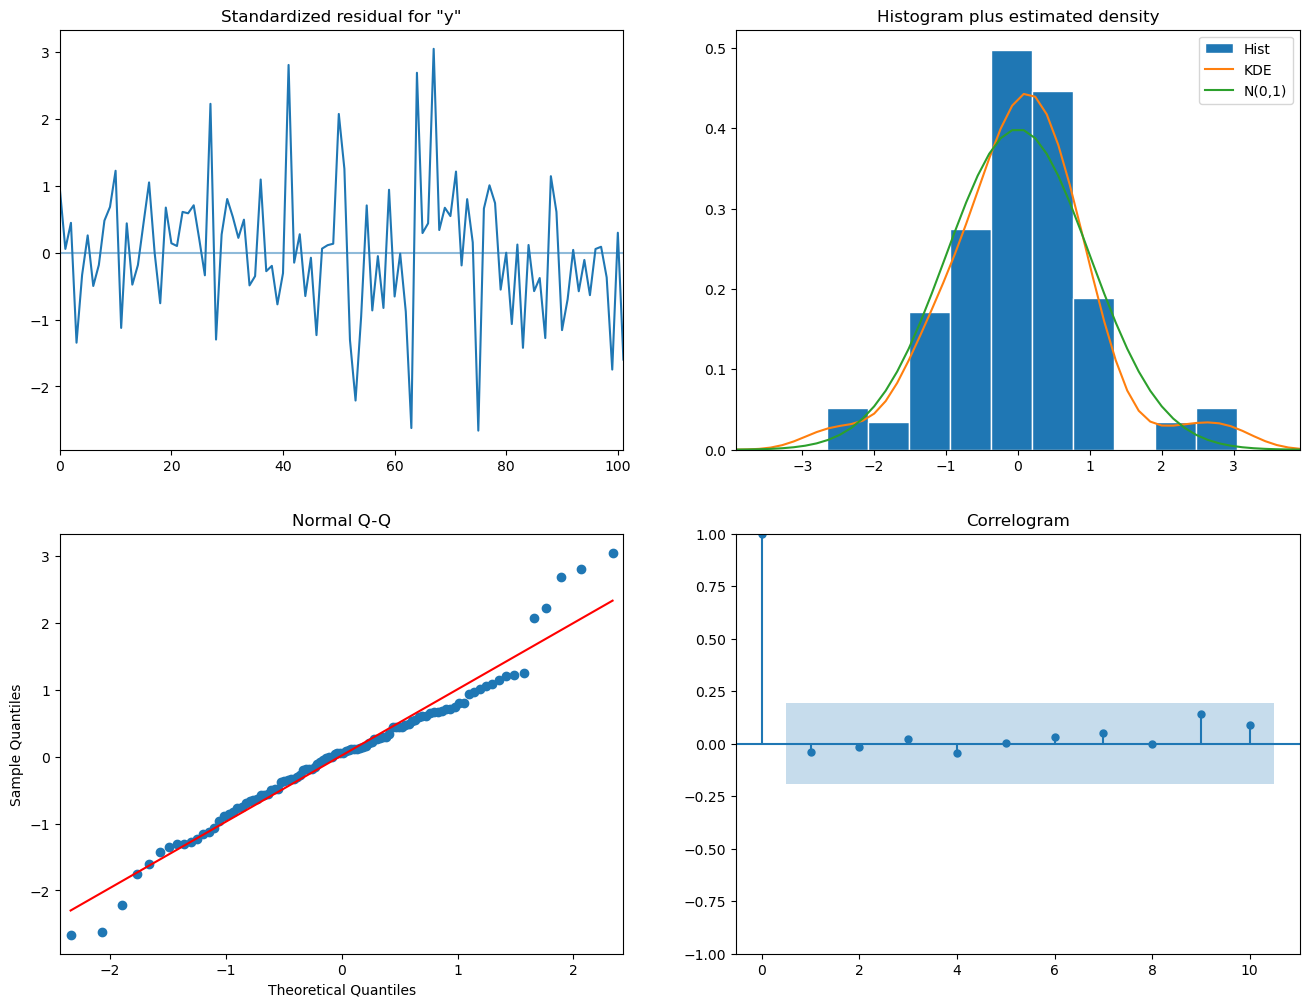

In [151]:
results_auto_SARIMA_12.plot_diagnostics(figsize=(16,12))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [153]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4695.827658  380.024041    3950.994223    5440.661092
1  7226.421438  388.881215    6464.228262    7988.614615
2  1584.449608  389.271579     821.491333    2347.407883
3  1417.418881  392.113420     648.890701    2185.947062
4  1828.761564  392.149644    1060.162386    2597.360742

In [154]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

712.7397433582619


In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto SARIMA(1,1,2),(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto ARMA(2,0,3)                      32.354130
Manual ARMA Model : ARIMA(1,0,0)      36.832600
Auto ARIMA(2,0,3)                     32.354130
Manual SARIMA(1,1,0),(3, 2, 3, 12)  1505.938183
Auto SARIMA(1,1,2),(2, 0, 2, 12)     712.739743

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.



## Building the most optimum model on the Full Data.

In [156]:
full_data_model = sm.tsa.statespace.SARIMAX(df_1['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.667
Date:                            Fri, 09 Aug 2024   AIC                           2361.334
Time:                                    22:18:53   BIC                           2385.885
Sample:                                01-01-1980   HQIC                          2371.304
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6526      0.269     -2.426      0.015      -1.180      -0.125
ma.L1         -0.1857      0.243   

#### <u>Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction</u>

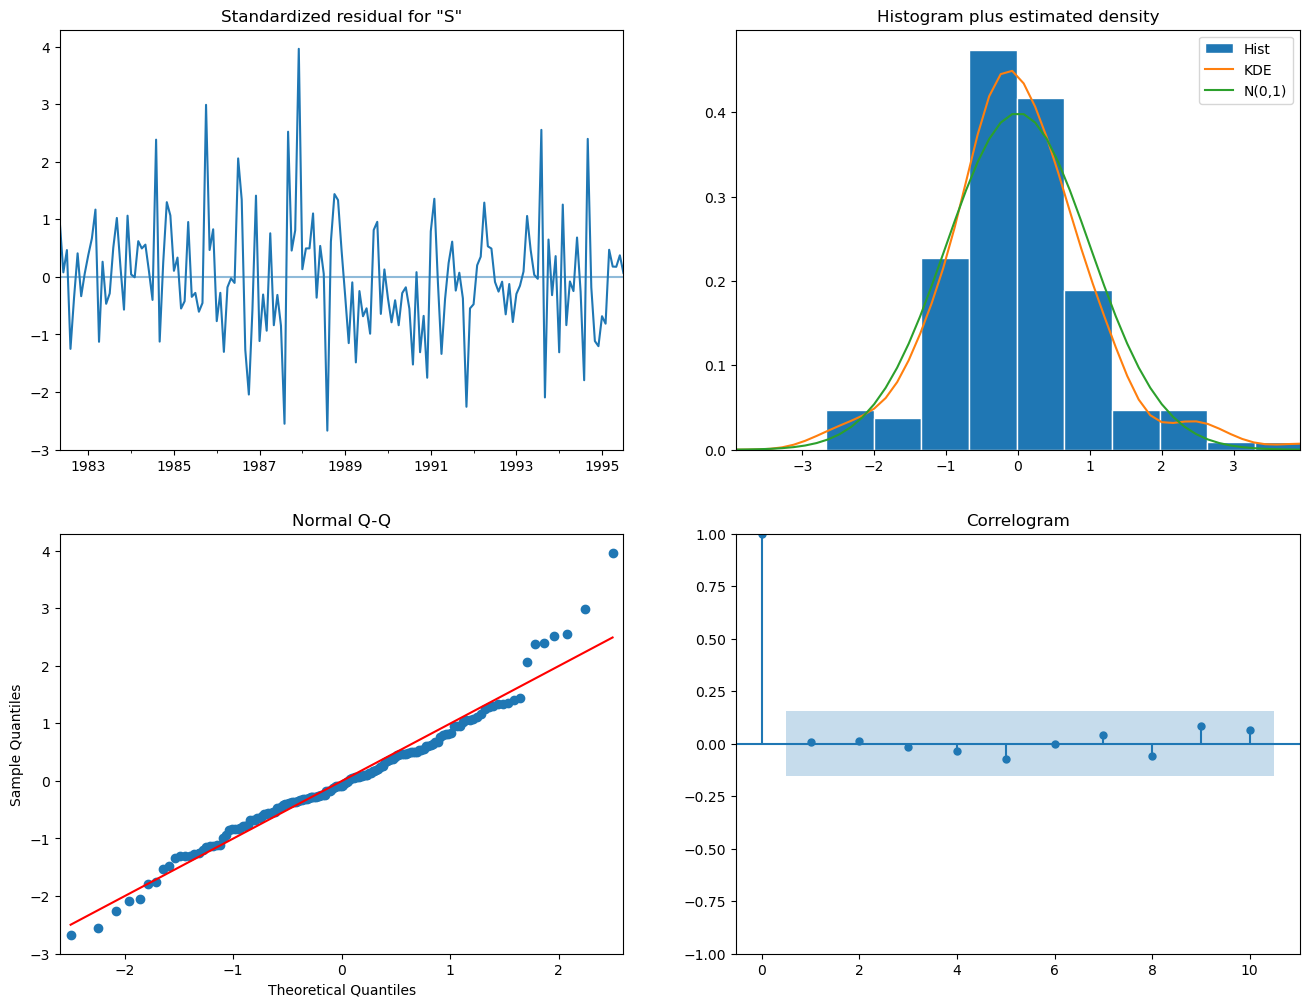

In [157]:
results_full_data_model.plot_diagnostics(figsize=(16,12));

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

## Evaluate the model on the whole and predict 12 months into the future 

In [158]:
predicted_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [159]:
predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1858.468176  380.977472    1111.766052    2605.170299
1995-09-01  2456.959549  385.928351    1700.553881    3213.365218
1995-10-01  3317.872942  386.037379    2561.253582    4074.492302
1995-11-01  4018.299886  387.808774    3258.208657    4778.391115
1995-12-01  6290.545813  387.869576    5530.335414    7050.756212

In [160]:
rmse = mean_squared_error(df_1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 542.7833061936605


In [161]:
pred_full_manual_SARIMA_date = predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

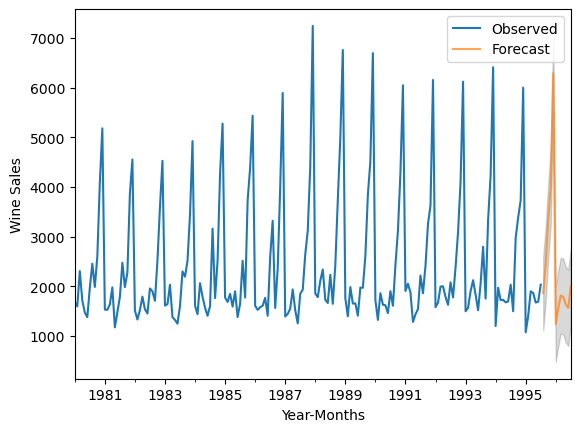

In [162]:
# plot the forecast along with the confidence band

axis = df_1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()

In [163]:
resultsDf

RMSE
Auto ARMA(2,0,3)                      32.354130
Manual ARMA Model : ARIMA(1,0,0)      36.832600
Auto ARIMA(2,0,3)                     32.354130
Manual SARIMA(1,1,0),(3, 2, 3, 12)  1505.938183
Auto SARIMA(1,1,2),(2, 0, 2, 12)     712.739743

#### You can see how AR model improves using different techniques 

### Rose Wines

In [164]:
# Importing the necessary packages

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

%matplotlib inline

In [165]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df_1 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [166]:
df_1.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [167]:
df_1.min()

Rose    28.0
dtype: float64

In [168]:
df_1.max()

Rose    267.0
dtype: float64

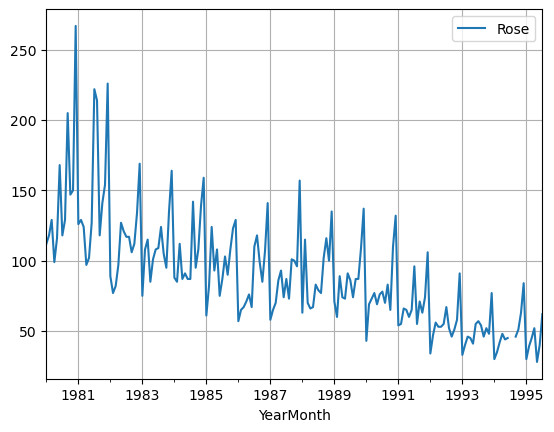

In [169]:
df_1.plot();
plt.grid()

### Method 2:

In [170]:
df_2 = pd.read_csv("Rose.csv")

In [171]:
df_2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

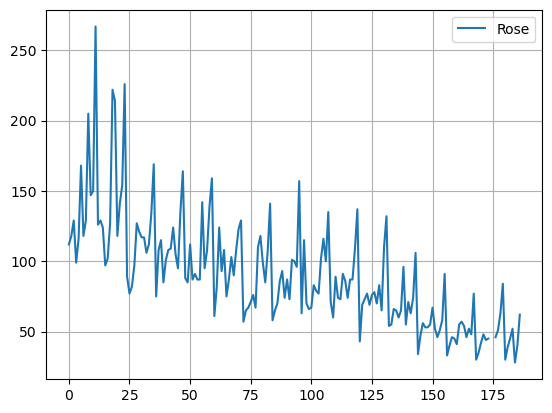

In [172]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [173]:
date = pd.date_range(start='1/1/1980', end='9/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [174]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [175]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

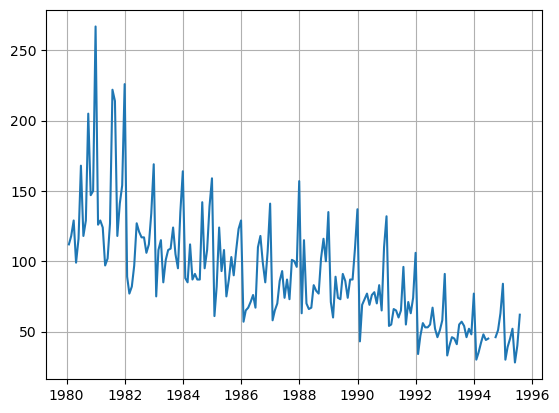

In [176]:
plt.plot(df_2['Time_Stamp'],df_2['Rose']);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

We notice that there is an increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality in the data as well.

# Find the mean and median of the monthly wine sales.

In [177]:
df_1.describe().round(2)

Rose
count  185.00
mean    90.39
std     39.18
min     28.00
25%     63.00
50%     86.00
75%    112.00
max    267.00

In [178]:
df_2.describe()

Rose                     Time_Stamp
count  185.000000                            187
mean    90.394595  1987-10-30 19:15:04.812834240
min     28.000000            1980-01-31 00:00:00
25%     63.000000            1983-12-15 12:00:00
50%     86.000000            1987-10-31 00:00:00
75%    112.000000            1991-09-15 00:00:00
max    267.000000            1995-07-31 00:00:00
std     39.175344                            NaN

# Plot a year on year boxplot for the  Rose Wine.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

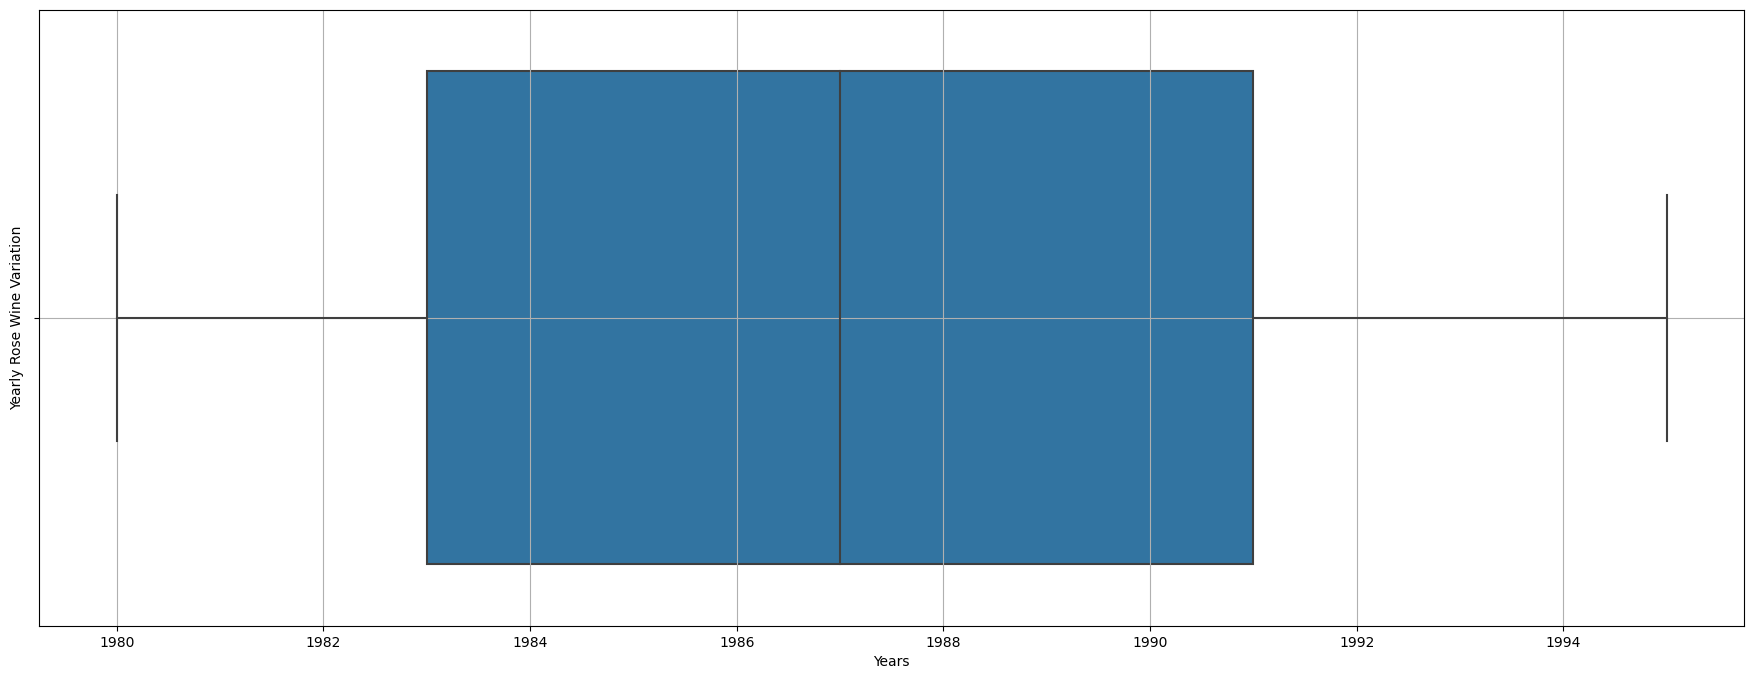

In [179]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_1.index.year, data=df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Variation');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of wine has no outliers .

# Plot a monthly boxplot for the wine sales taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

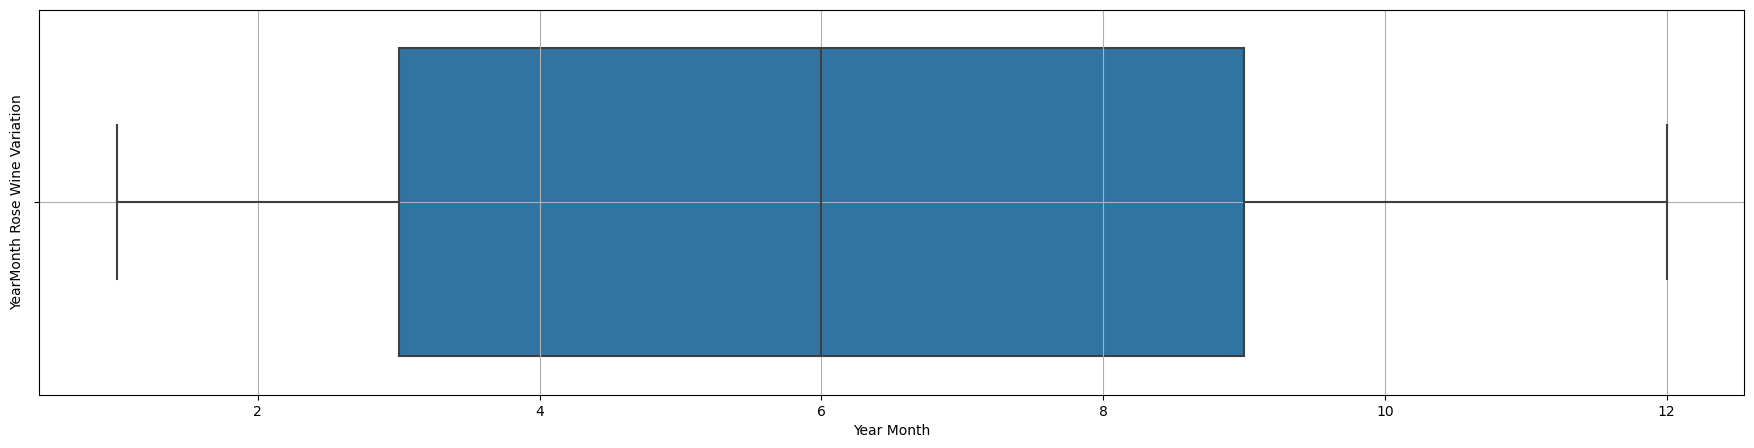

In [180]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df_1.index.month, data=df_1, ax=ax,whis=1.5)
plt.xlabel('Year Month');
plt.ylabel('YearMonth Rose Wine Variation');
plt.grid();


The boxplots for the monthly sales for different years does not show any outliers.

# Plot a monthplot of the give Time Series.

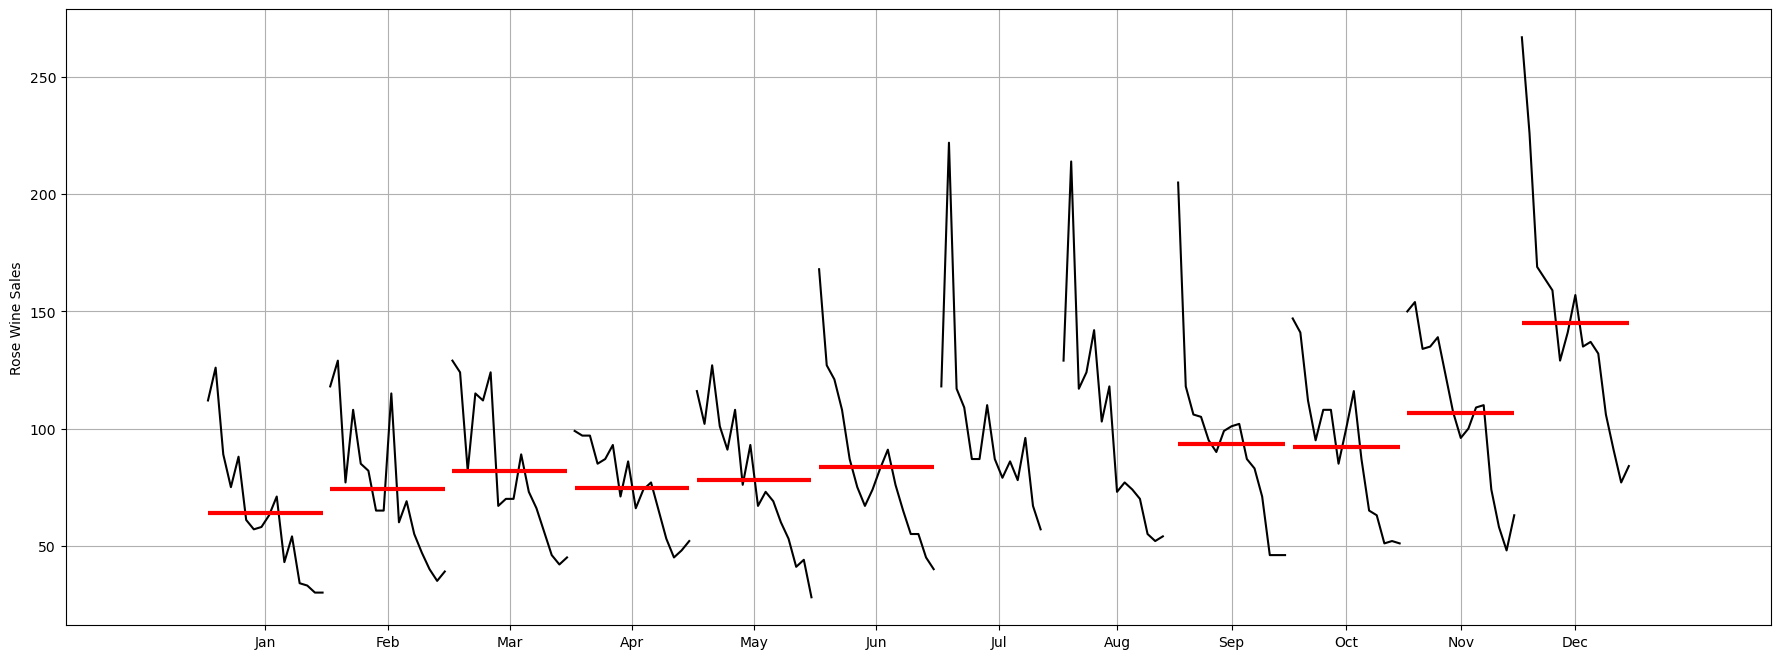

In [181]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [182]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [183]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [184]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Rose', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

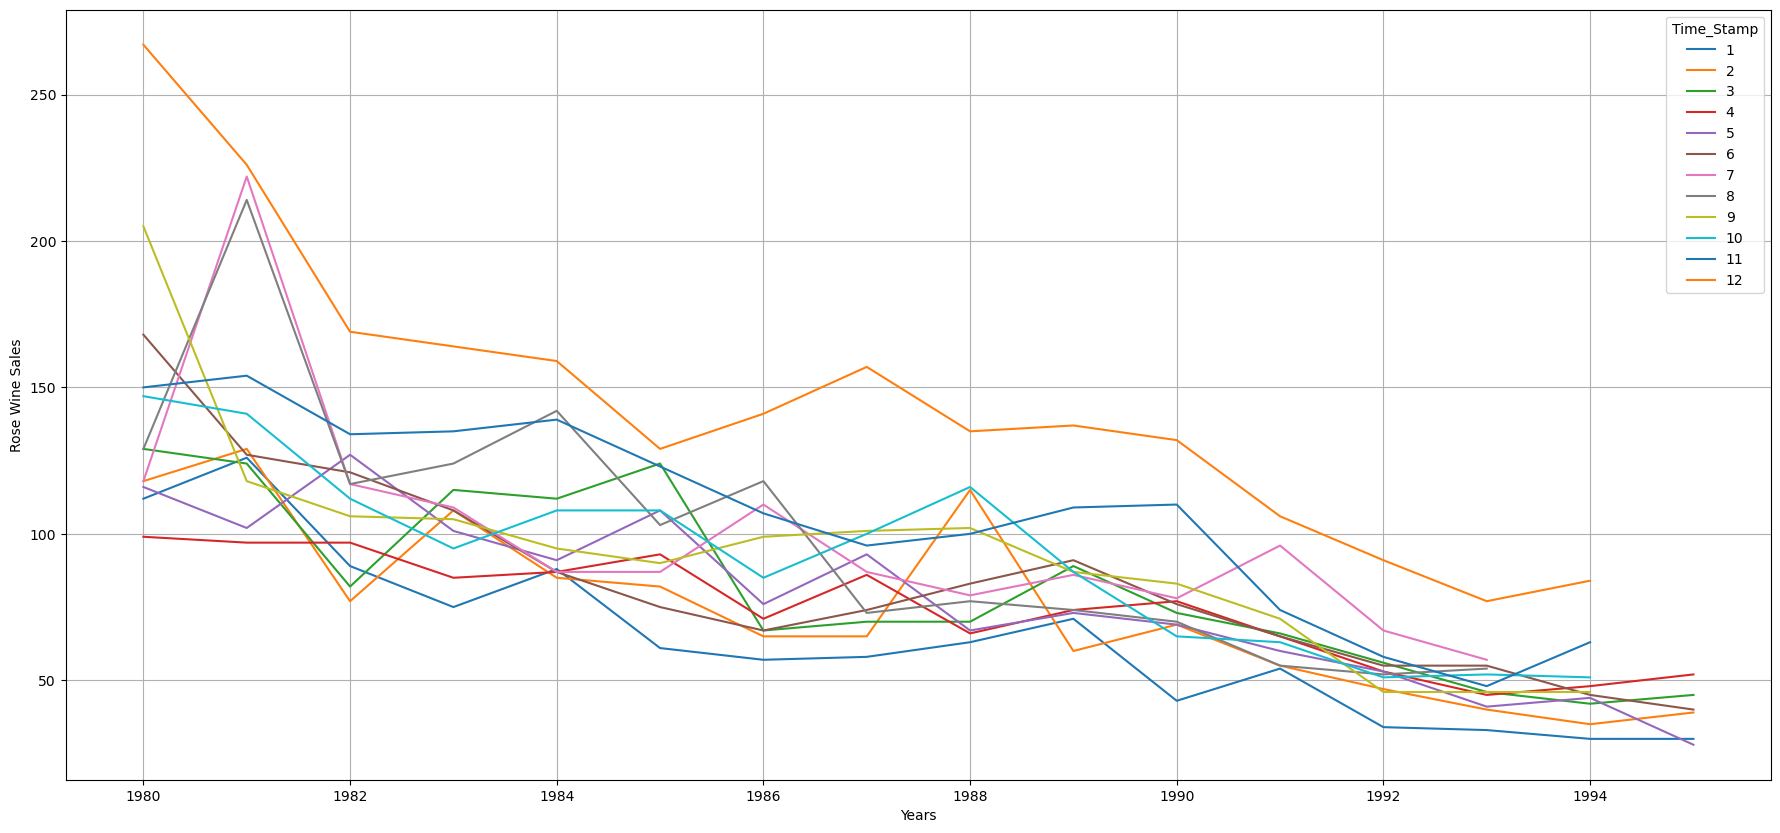

In [185]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.xlabel('Years');
plt.ylabel('Rose Wine Sales');
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.



### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [186]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

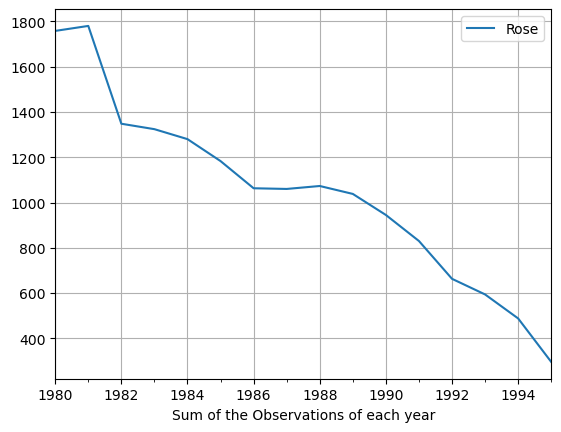

In [187]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [188]:
df_yearly_mean = df_1.resample('Y').mean().round(2)
df_yearly_mean.head()

Rose
YearMonth         
1980-12-31  146.50
1981-12-31  148.33
1982-12-31  112.33
1983-12-31  110.33
1984-12-31  106.67

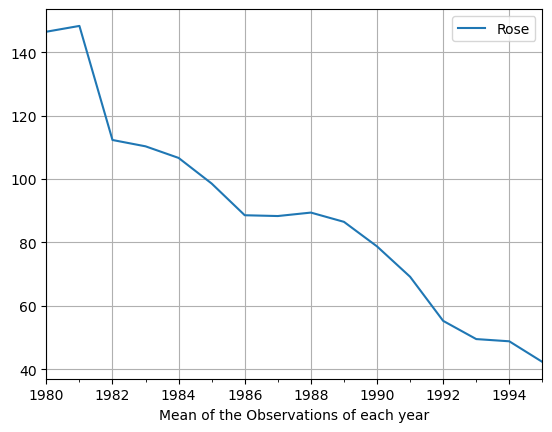

In [189]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

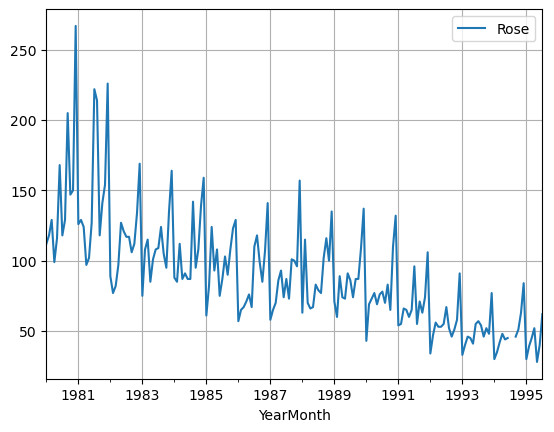

In [190]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [191]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

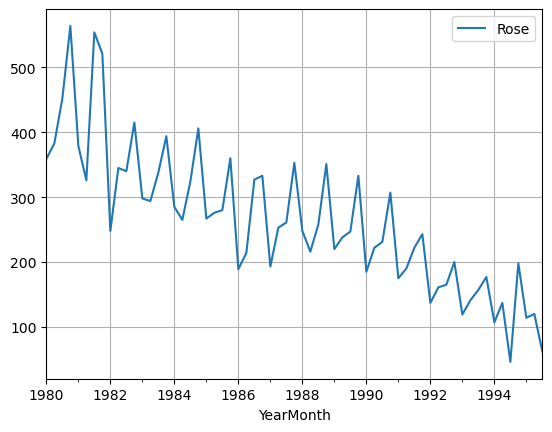

In [192]:
df_quarterly_sum.plot();
plt.grid()

In [193]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

Rose
YearMonth             
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

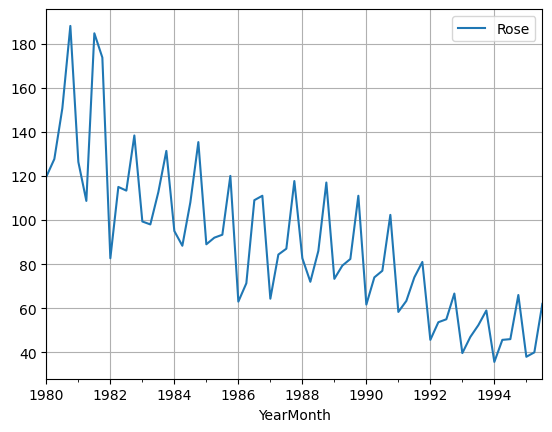

In [194]:
df_quarterly_mean.plot();
plt.grid()

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [195]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

Rose
YearMonth        
1980-01-01  112.0
1980-01-02    0.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    0.0
...           ...
1995-06-27    0.0
1995-06-28    0.0
1995-06-29    0.0
1995-06-30    0.0
1995-07-01   62.0

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

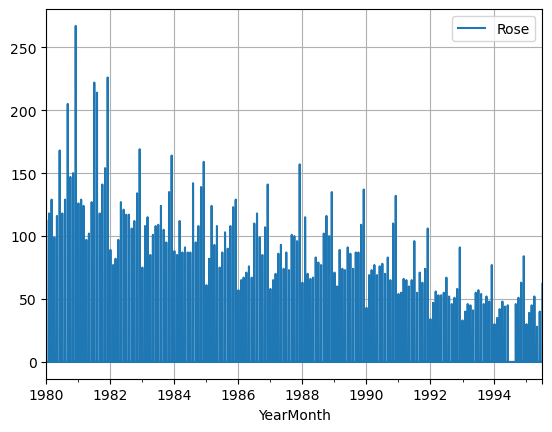

In [196]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

In [197]:
df_daily_mean = df_1.resample('D').mean()
df_daily_mean.head()

Rose
YearMonth        
1980-01-01  112.0
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    NaN

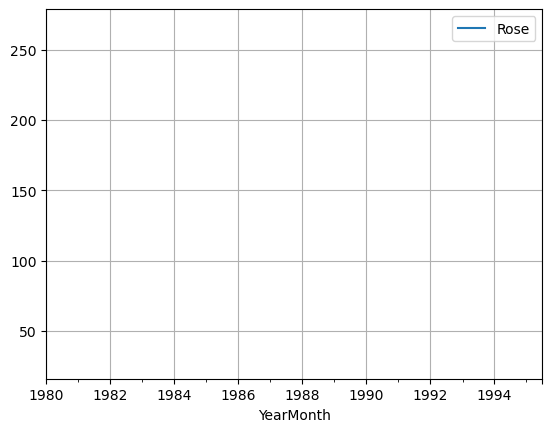

In [198]:
df_daily_mean.plot();
plt.grid()

### Decade Plot

In [199]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

Rose
YearMonth          
1980-12-31   1758.0
1990-12-31  12094.0
2000-12-31   2871.0

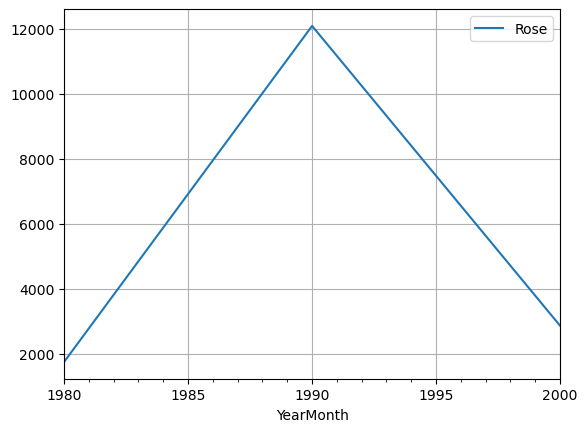

In [200]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Missing Value Handling

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

This particular data does not contain any missing values. Let us try to insert a missing value and then impute it using the methods at our disposal.

In [201]:
df_1.isna().sum()

Rose    2
dtype: int64

We see that there are 2 missing value present.



### Let's impute missing values with Interpolation

In [202]:
df_1=df_1.interpolate(method ='linear')

In [203]:
df_1.isna().sum()

Rose    0
dtype: int64

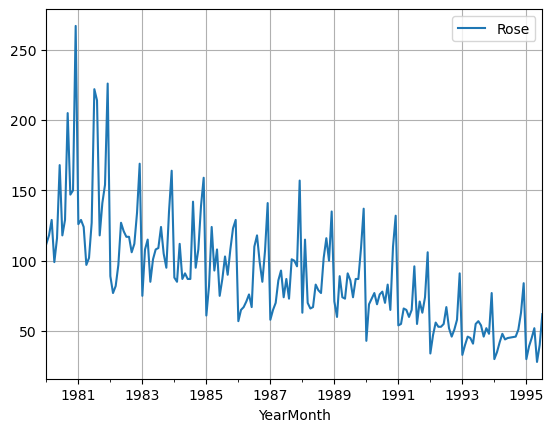

In [204]:
df_1.plot();
plt.grid()

# Decompose the Time Series

### Additive Model

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

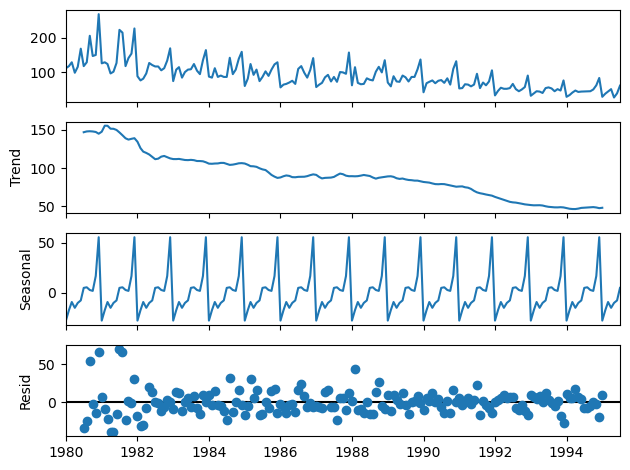

In [206]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [207]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [208]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.91
1980-02-01   -17.44
1980-03-01    -9.29
1980-04-01   -15.10
1980-05-01   -10.20
1980-06-01    -7.68
1980-07-01     4.90
1980-08-01     5.50
1980-09-01     2.77
1980-10-01     1.87
1980-11-01    16.85
1980-12-01    55.71
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   -33.98
1980-08-01   -24.62
1980-09-01    53.85
1980-10-01    -2.96
1980-11-01   -14.26
1980-12-01    66.16
Name: resid, dtype: float64 



In [209]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    113.10
1980-08-01    123.50
1980-09-01    202.23
1980-10-01    145.13
1980-11-01    133.15
1980-12-01    211.29
dtype: float64

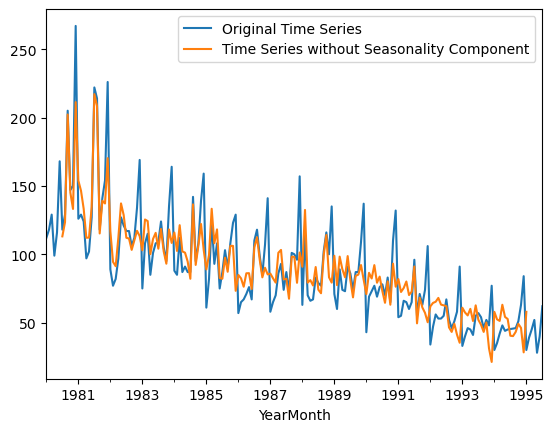

In [210]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

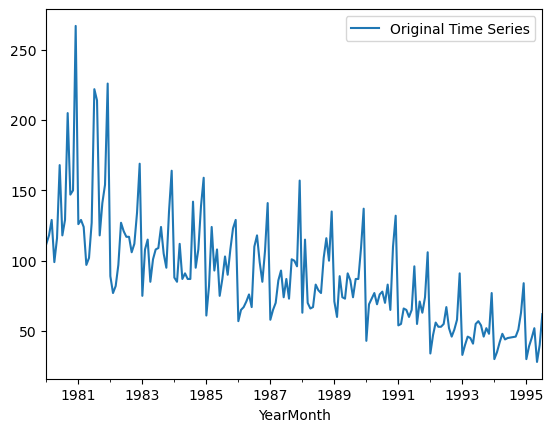

In [211]:
df_1.plot()

plt.legend(["Original Time Series"]);

## Split the data into train and test and plot the training and test data. [30% of the most recent data should be in the test set]

In [212]:
train    =   df_1[0:int(len(df_1)*0.7)] 
test     =   df_1[int(len(df_1)*0.7):]

In [213]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [214]:
from IPython.display import display

In [215]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0

First few rows of Test Data


Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

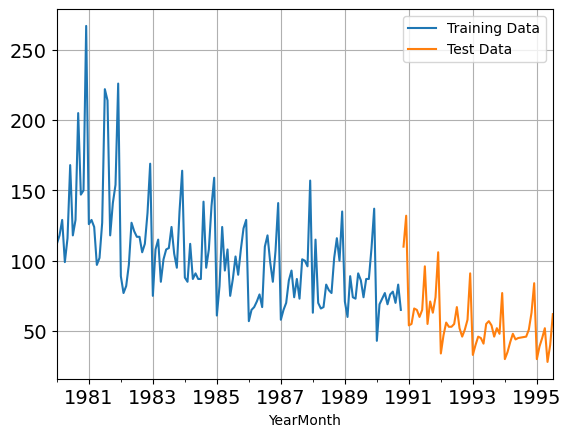

In [216]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [217]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [218]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [219]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130

First few rows of Test Data


Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
lr = LinearRegression()

In [222]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

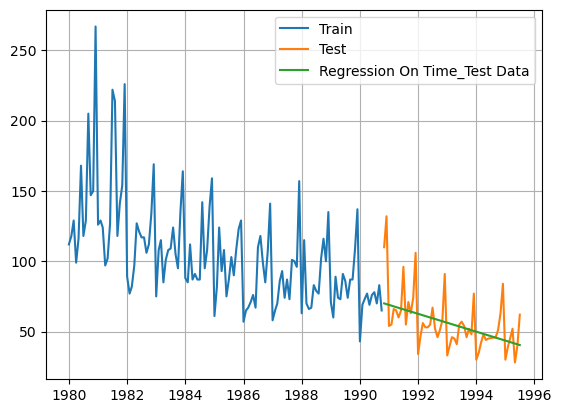

In [223]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [224]:
from sklearn import metrics

### Model Evaluation

In [225]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.356 


In [226]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  17.355796

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [227]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [228]:
train.tail()

Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0

In [229]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-01    65.0
1990-12-01    65.0
1991-01-01    65.0
1991-02-01    65.0
1991-03-01    65.0
Name: naive, dtype: float64

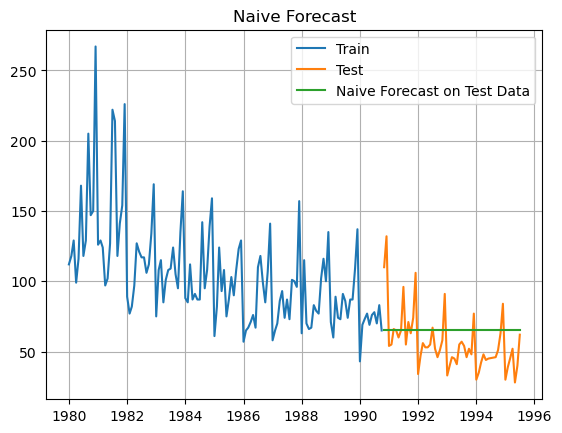

In [230]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [231]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 21.767


In [232]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  17.355796
NaiveModel        21.766930

## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [233]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [234]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                       
1990-11-01  110.0     104.692308
1990-12-01  132.0     104.692308
1991-01-01   54.0     104.692308
1991-02-01   55.0     104.692308
1991-03-01   66.0     104.692308

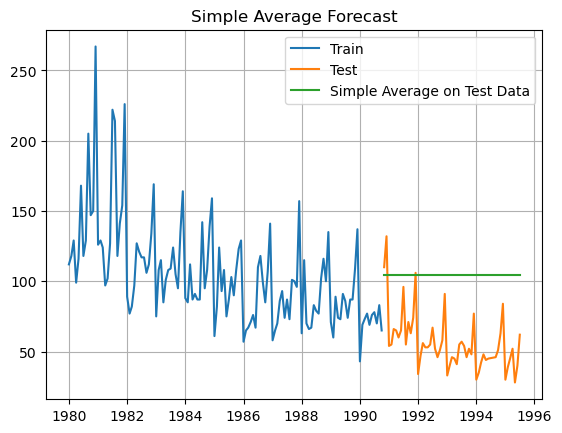

In [235]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [236]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.412


In [237]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    17.355796
NaiveModel          21.766930
SimpleAverageModel  52.412093

## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [238]:
MovingAverage = df_1.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [239]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

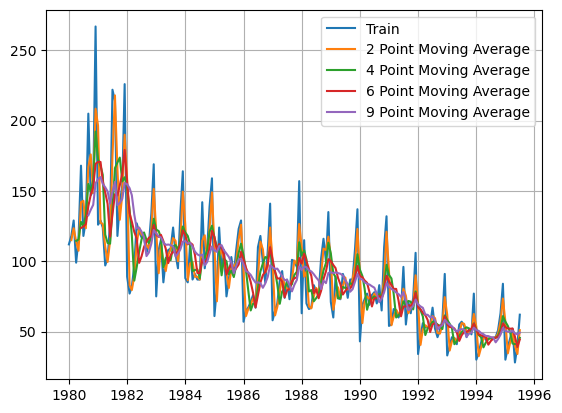

In [240]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [241]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

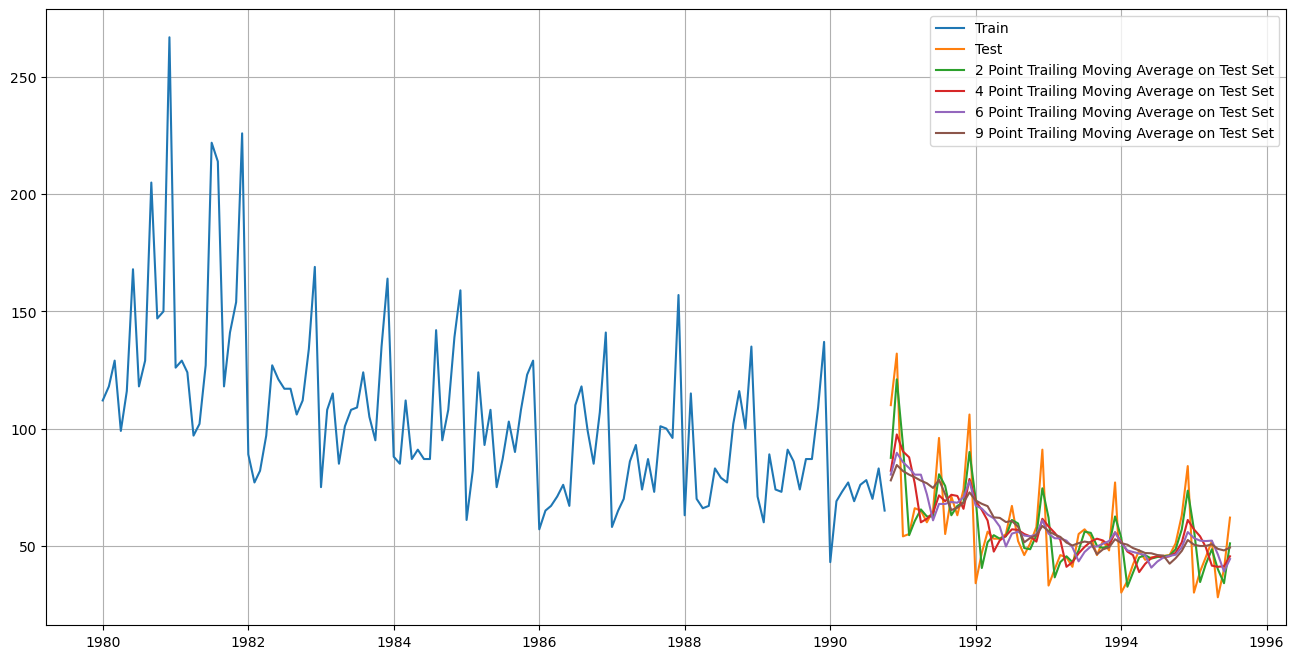

In [242]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [243]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342


In [244]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             17.355796
NaiveModel                   21.766930
SimpleAverageModel           52.412093
2pointTrailingMovingAverage  11.801043
4pointTrailingMovingAverage  15.367212
6pointTrailingMovingAverage  15.862350
9pointTrailingMovingAverage  16.341919

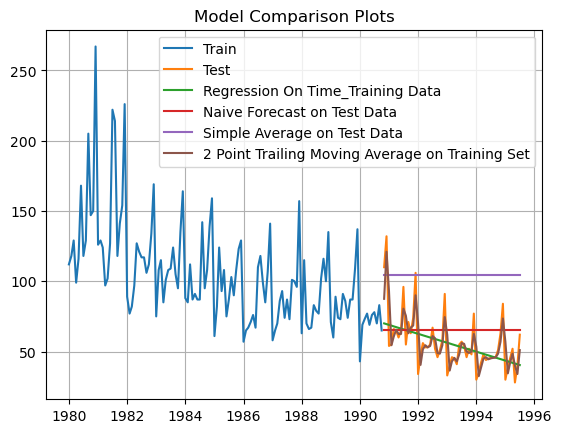

In [245]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Simple Exponential Smoothing

/////////### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [246]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [247]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [248]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.10272102693138321,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26276399362473,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [249]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-01    78.899523
1990-12-01    78.899523
1991-01-01    78.899523
1991-02-01    78.899523
1991-03-01    78.899523
1991-04-01    78.899523
1991-05-01    78.899523
1991-06-01    78.899523
1991-07-01    78.899523
1991-08-01    78.899523
1991-09-01    78.899523
1991-10-01    78.899523
1991-11-01    78.899523
1991-12-01    78.899523
1992-01-01    78.899523
1992-02-01    78.899523
1992-03-01    78.899523
1992-04-01    78.899523
1992-05-01    78.899523
1992-06-01    78.899523
1992-07-01    78.899523
1992-08-01    78.899523
1992-09-01    78.899523
1992-10-01    78.899523
1992-11-01    78.899523
1992-12-01    78.899523
1993-01-01    78.899523
1993-02-01    78.899523
1993-03-01    78.899523
1993-04-01    78.899523
1993-05-01    78.899523
1993-06-01    78.899523
1993-07-01    78.899523
1993-08-01    78.899523
1993-09-01    78.899523
1993-10-01    78.899523
1993-11-01    78.899523
1993-12-01    78.899523
1994-01-01    78.899523
1994-02-01    78.899523
1994-03-01    78.899523
1994-04-01    78

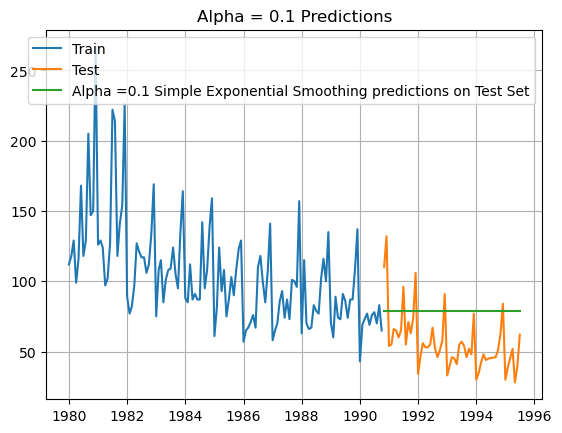

In [250]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.1 Predictions');

In [251]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [252]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 30.188324812317873
SES RMSE (calculated using statsmodels): 30.188324812317873


In [253]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.1,SES'])
resultsDf

Test RMSE
Alpha=0.1,SES  30.188325

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [254]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 4.3228814168489945e-07, 'smoothing_trend': 1.1863431936839864e-07, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 139.37639812604982, 'initial_trend': -0.529318269973793, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [255]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-01    70.035704
1990-12-01    69.506386
1991-01-01    68.977067
1991-02-01    68.447749
1991-03-01    67.918431
1991-04-01    67.389113
1991-05-01    66.859794
1991-06-01    66.330476
1991-07-01    65.801158
1991-08-01    65.271840
1991-09-01    64.742521
1991-10-01    64.213203
1991-11-01    63.683885
1991-12-01    63.154566
1992-01-01    62.625248
1992-02-01    62.095930
1992-03-01    61.566612
1992-04-01    61.037293
1992-05-01    60.507975
1992-06-01    59.978657
1992-07-01    59.449339
1992-08-01    58.920020
1992-09-01    58.390702
1992-10-01    57.861384
1992-11-01    57.332066
1992-12-01    56.802747
1993-01-01    56.273429
1993-02-01    55.744111
1993-03-01    55.214792
1993-04-01    54.685474
1993-05-01    54.156156
1993-06-01    53.626838
1993-07-01    53.097519
1993-08-01    52.568201
1993-09-01    52.038883
1993-10-01    51.509565
1993-11-01    50.980246
1993-12-01    50.450928
1994-01-01    49.921610
1994-02-01    49.392291
1994-03-01    48.862973
1994-04-01    48

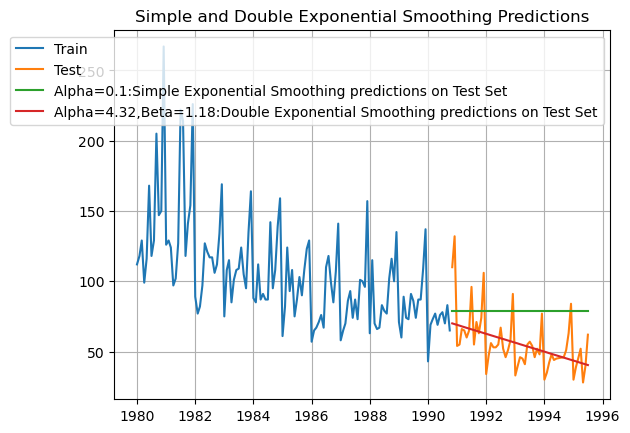

In [256]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=4.32,Beta=1.18:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [257]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 17.355555533173796


In [258]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=4.32,Beta=1.18:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.1,SES             30.188325
Alpha=4.32,Beta=1.18:DES  17.355556

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [259]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08808451025314779, 'smoothing_trend': 0.00010195127285726443, 'smoothing_seasonal': 0.0018138637576130025, 'damping_trend': nan, 'initial_level': 146.81409287235113, 'initial_trend': -0.5554042754470411, 'initial_seasons': array([-31.16556612, -18.78286869, -10.8111508 , -21.36232035,
       -12.56088077,  -7.16384923,   2.74297812,   8.84205988,
         4.8652509 ,   3.0332219 ,  19.62015059,  63.88595531]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [260]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-01     93.675958
1990-12-01    137.384636
1991-01-01     41.779518
1991-02-01     53.607225
1991-03-01     61.023909
1991-04-01     49.916636
1991-05-01     58.162228
1991-06-01     63.004377
1991-07-01     72.355809
1991-08-01     77.898822
1991-09-01     73.367644
1991-10-01     71.004428
1991-11-01     87.011190
1991-12-01    130.719868
1992-01-01     35.114750
1992-02-01     46.942457
1992-03-01     54.359141
1992-04-01     43.251868
1992-05-01     51.497460
1992-06-01     56.339609
1992-07-01     65.691041
1992-08-01     71.234054
1992-09-01     66.702875
1992-10-01     64.339659
1992-11-01     80.346421
1992-12-01    124.055100
1993-01-01     28.449982
1993-02-01     40.277689
1993-03-01     47.694373
1993-04-01     36.587100
1993-05-01     44.832692
1993-06-01     49.674841
1993-07-01     59.026273
1993-08-01     64.569286
1993-09-01     60.038107
1993-10-01     57.674891
1993-11-01     73.681653
1993-12-01    117.390332
1994-01-01     21.785214
1994-02-01     33.612921


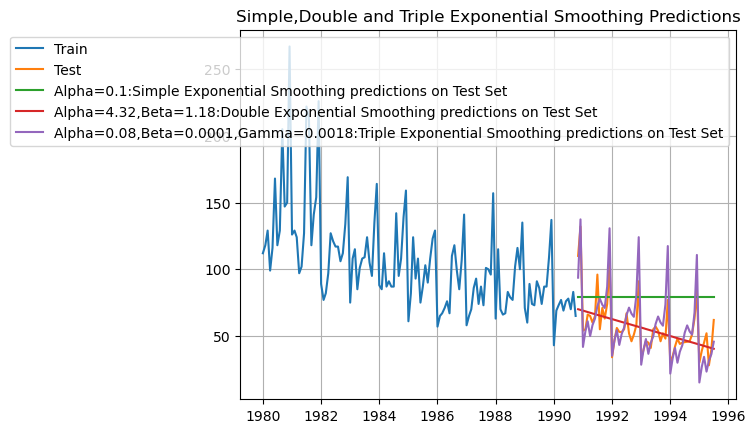

In [261]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=4.32,Beta=1.18:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=0.0001,Gamma=0.0018:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [262]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 13.956634370191152


In [263]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.08,Beta=0.0001,Gamma=0.0018:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.1,SES                            30.188325
Alpha=4.32,Beta=1.18:DES                 17.355556
Alpha=0.08,Beta=0.0001,Gamma=0.0018:TES  13.956634

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [264]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09941326775571543, 'smoothing_trend': 2.4733033543760145e-09, 'smoothing_seasonal': 2.2407585658472406e-07, 'damping_trend': nan, 'initial_level': 159.83733634496218, 'initial_trend': -0.6452822286294049, 'initial_seasons': array([0.68601845, 0.77534772, 0.84776999, 0.74348018, 0.83458381,
       0.89900006, 0.98970025, 1.05839694, 0.99093964, 0.97471991,
       1.12073306, 1.54535628]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [265]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-11-01     86.304029
1990-12-01    118.005690
1991-01-01     51.942705
1991-02-01     58.206068
1991-03-01     63.095821
1991-04-01     54.854235
1991-05-01     61.037346
1991-06-01     65.168319
1991-07-01     71.104521
1991-08-01     75.357032
1991-09-01     69.914699
1991-10-01     68.141366
1991-11-01     77.625759
1991-12-01    106.039399
1992-01-01     46.630600
1992-02-01     52.202250
1992-03-01     56.531210
1992-04-01     49.097180
1992-05-01     54.574841
1992-06-01     58.207014
1992-07-01     63.440889
1992-08-01     67.161456
1992-09-01     62.241470
1992-10-01     60.593732
1992-11-01     68.947489
1992-12-01     94.073108
1993-01-01     41.318494
1993-02-01     46.198432
1993-03-01     49.966599
1993-04-01     43.340125
1993-05-01     48.112335
1993-06-01     51.245709
1993-07-01     55.777258
1993-08-01     58.965880
1993-09-01     54.568241
1993-10-01     53.046098
1993-11-01     60.269219
1993-12-01     82.106817
1994-01-01     36.006388
1994-02-01     40.194614


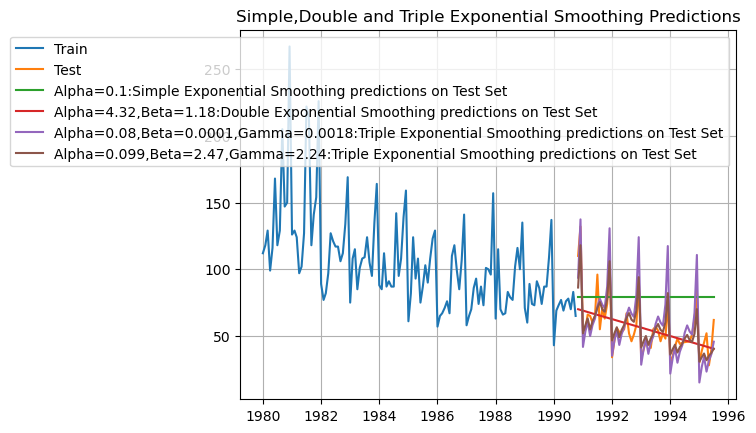

In [266]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=4.32,Beta=1.18:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=0.0001,Gamma=0.0018:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am, label='Alpha=0.099,Beta=2.47,Gamma=2.24:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [267]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 9.325495373775633


In [268]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.099,Beta=2.47,Gamma=2.24,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.1,SES                                 30.188325
Alpha=4.32,Beta=1.18:DES                      17.355556
Alpha=0.08,Beta=0.0001,Gamma=0.0018:TES       13.956634
Alpha=0.099,Beta=2.47,Gamma=2.24,Gamma=0:TES   9.325495

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

## Check for stationarity of the whole Time Series data.

In [269]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

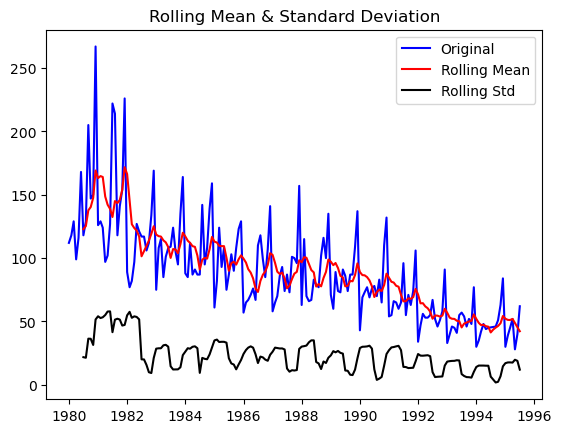

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [270]:
test_stationarity(df_1['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


Let us take a difference of order 1 and check whether the Time Series is stationary or not.

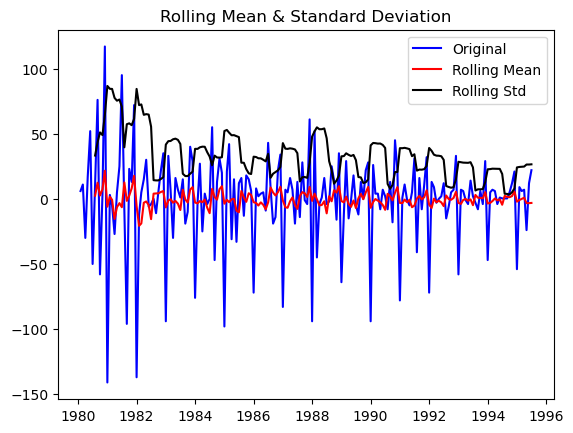

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [271]:
test_stationarity(df_1['Rose'].diff().dropna())

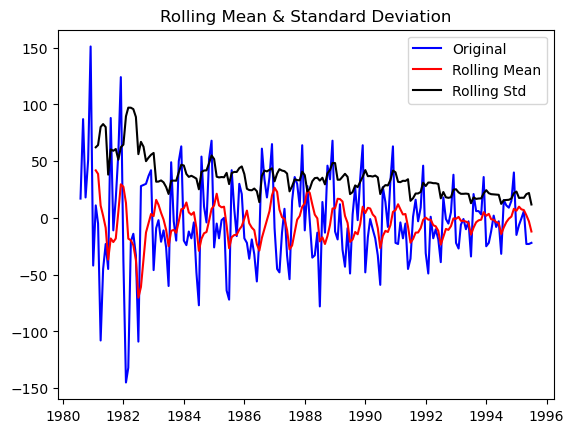

Results of Dickey-Fuller Test:
Test Statistic                  -3.844254
p-value                          0.002486
#Lags Used                      12.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64 



In [272]:
test_stationarity(df_1['Rose'].diff(periods=7).dropna())

We see that at p-value is less than 0.05 the Time Series is indeed stationary.

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Plot the Autocorrelation function plots on the whole data.

In [273]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

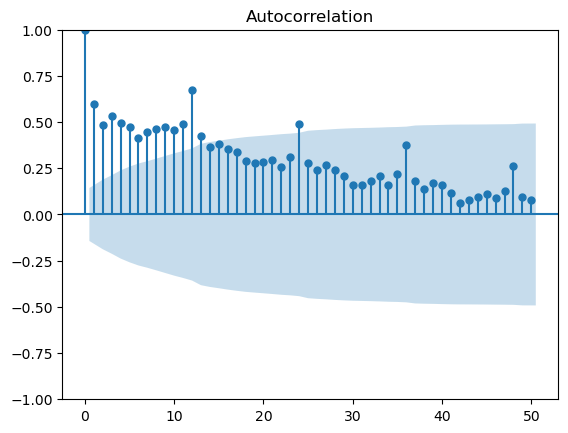

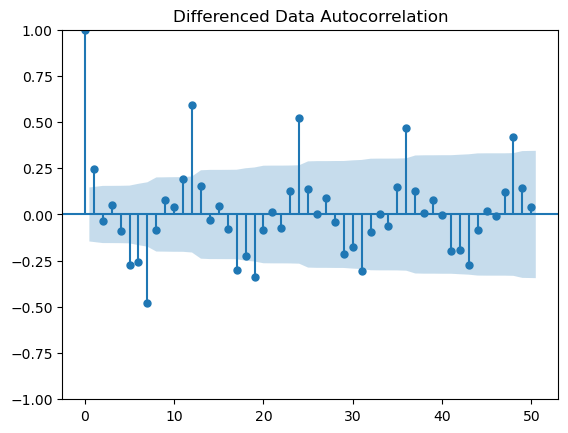

In [274]:
plot_acf(df_1['Rose'],lags=50)
plot_acf(df_1['Rose'].diff(periods=7).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

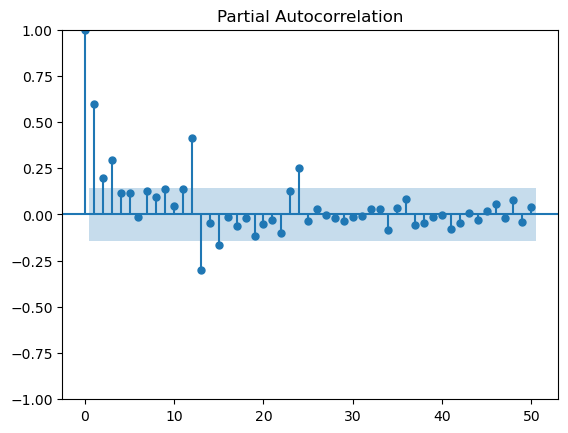

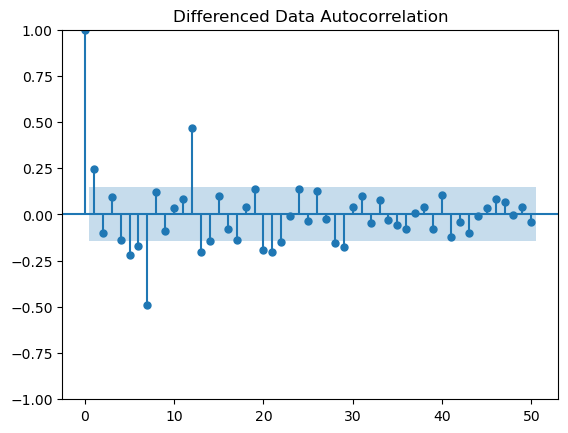

In [275]:
plot_pacf(df_1['Rose'],lags=50)
plot_pacf(df_1['Rose'].diff(periods=7).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Finding the value of the d parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=7.


### Finding the value of the p parameter
##### we are going to find the optimal value of p which is our number of autoregressive terms. We can find this value by inspecting the PACF plot.The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.



### Finding the value of the q parameter
#####  find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.




### From the above plots, we can say that value of d=7, p=4, q=2

## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [276]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [277]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [278]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC._append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1306.2886900846738
ARIMA(0, 0, 1) - AIC:1287.093068069135
ARIMA(0, 0, 2) - AIC:1288.1168156033086
ARIMA(1, 0, 0) - AIC:1282.8842432626534
ARIMA(1, 0, 1) - AIC:1273.969671561656
ARIMA(1, 0, 2) - AIC:1272.0089605615185
ARIMA(2, 0, 0) - AIC:1283.4621278745649
ARIMA(2, 0, 1) - AIC:1272.7845600916085
ARIMA(2, 0, 2) - AIC:1272.2305289574472


In [279]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1272.008961
8  (2, 0, 2)  1272.230529
7  (2, 0, 1)  1272.784560
4  (1, 0, 1)  1273.969672
3  (1, 0, 0)  1282.884243
6  (2, 0, 0)  1283.462128
1  (0, 0, 1)  1287.093068
2  (0, 0, 2)  1288.116816
0  (0, 0, 0)  1306.288690

In [280]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,0,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -631.004
Date:                Fri, 09 Aug 2024   AIC                           1272.009
Time:                        22:19:05   BIC                           1286.347
Sample:                    01-01-1980   HQIC                          1277.835
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.6906     31.457      3.328      0.001      43.036     166.345
ar.L1          0.9886      0.024     41.384      0.000       0.942       1.035
ma.L1         -0.6983      0.089     -7.839      0.0

## Predict on the Test Set using this model and evaluate the model.

In [281]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [282]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

38.646417719381866


In [283]:


resultsstatDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARMA(0,1,2)'])


resultsstatDf

RMSE
Auto ARMA(0,1,2)  38.646418

**Note: the best model for ARMA is an AR MODEL as AR(1)**

### Manual ARMA

In [284]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,0,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -629.829
Date:                Fri, 09 Aug 2024   AIC                           1275.658
Time:                        22:19:05   BIC                           1298.598
Sample:                    01-01-1980   HQIC                          1284.979
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.7319     32.570      3.216      0.001      40.897     168.567
ar.L1          0.1838      0.115      1.595      0.111      -0.042       0.410
ar.L2          0.8672      0.134      6.470      0.0

## Predict on the Test Set using this model and evaluate the model.

In [285]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [286]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

37.56841928625284


In [287]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual ARIMA(4,0,2)'])

resultsstatDf = pd.concat([resultsstatDf, resultsDf])
resultsstatDf

RMSE
Auto ARMA(0,1,2)     38.646418
Manual ARIMA(4,0,2)  37.568419

## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [288]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [289]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [290]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1313.1758613526429
ARIMA(0, 1, 1) - AIC:1261.32744384058
ARIMA(0, 1, 2) - AIC:1259.2477803151237
ARIMA(1, 1, 0) - AIC:1297.077294384856
ARIMA(1, 1, 1) - AIC:1260.0367627036358
ARIMA(1, 1, 2) - AIC:1259.47320495012
ARIMA(2, 1, 0) - AIC:1278.135280748431
ARIMA(2, 1, 1) - AIC:1261.0140762917006
ARIMA(2, 1, 2) - AIC:1261.4720006568991


In [291]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

In [292]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -626.624
Date:                Fri, 09 Aug 2024   AIC                           1259.248
Time:                        22:19:06   BIC                           1267.827
Sample:                    01-01-1980   HQIC                          1262.734
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

## Predict on the Test Set using this model and evaluate the model.

In [293]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [294]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

30.90380440578771


In [295]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto ARIMA(0,1,2)'])



resultsstatDf = pd.concat([resultsstatDf, resultsDf])
resultsstatDf

RMSE
Auto ARMA(0,1,2)     38.646418
Manual ARIMA(4,0,2)  37.568419
Auto ARIMA(0,1,2)    30.903804

### Manual SARIMA

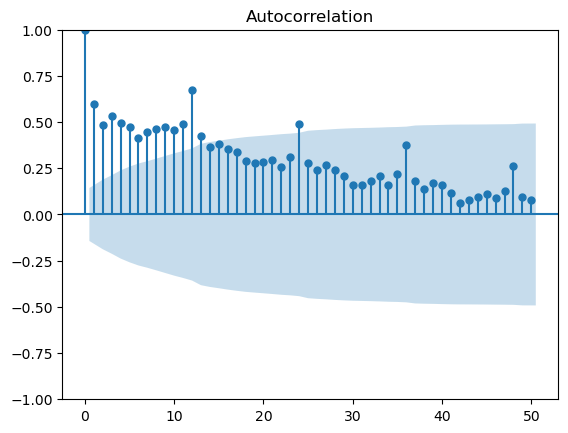

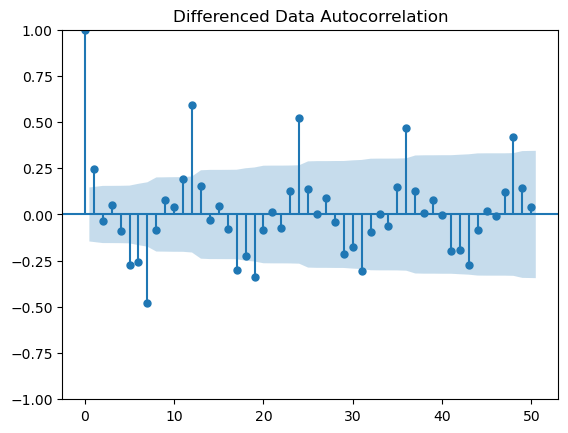

In [296]:
plot_acf(df_1['Rose'],lags=50)
plot_acf(df_1['Rose'].diff(periods=7).dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

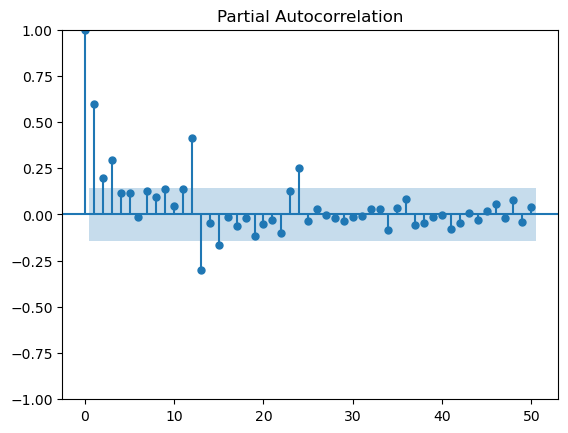

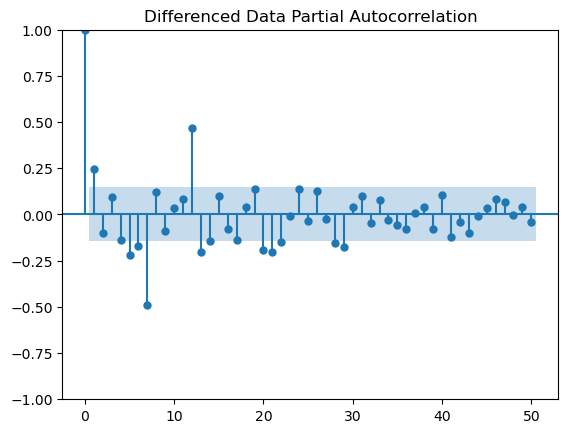

In [297]:
plot_pacf(df_1['Rose'],lags=50)
plot_pacf(df_1['Rose'].diff(periods=7).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Finding the value of the d parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=7.


### Finding the value of the p parameter
##### we are going to find the optimal value of p which is our number of autoregressive terms. We can find this value by inspecting the PACF plot.The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.



### Finding the value of the q parameter
#####  find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.


### Finding the value of the D parameter
##### It is done based on number of periods used in differencing to make data stationary. so our d=7.


### Finding the value of the P parameter
#####  Number of lags before which we see a peak change in ACF plot.  Our P is 1


### Finding the value of the Q parameter
#####  Number of lags before which we see a peak change in ACF plot.  Our Q is 6

In [298]:


manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(4,0,2),
                                seasonal_order=(1, 1, 6, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                             SARIMAX Results                                              
Dep. Variable:                                               Rose   No. Observations:                  130
Model:             SARIMAX(4, 0, 2)x(1, 1, [1, 2, 3, 4, 5, 6], 6)   Log Likelihood               -3402.731
Date:                                            Fri, 09 Aug 2024   AIC                           6833.462
Time:                                                    22:19:08   BIC                           6867.659
Sample:                                                01-01-1980   HQIC                          6847.217
                                                     - 10-01-1990                                         
Covariance Type:                                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

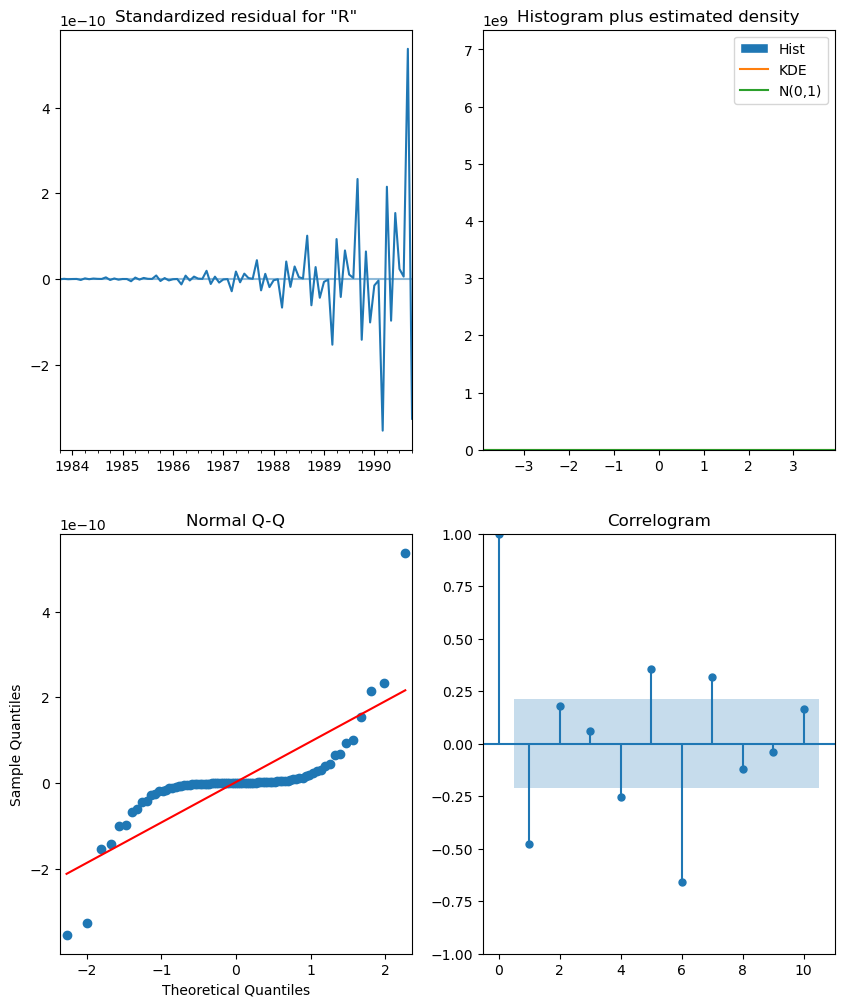

In [299]:
results_manual_SARIMA_6.plot_diagnostics(figsize=(10,12))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [300]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [301]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

Rose                mean       mean_se  mean_ci_lower  mean_ci_upper
1990-11-01 -1.430434e+07  9.697139e+16  -1.900604e+17   1.900604e+17
1990-12-01 -6.134662e+08  4.313297e+18  -8.453906e+18   8.453906e+18
1991-01-01 -2.714280e+10  1.909000e+20  -3.741570e+20   3.741570e+20
1991-02-01 -1.201304e+12  8.448988e+21  -1.655971e+22   1.655971e+22
1991-03-01 -5.316811e+13  3.739414e+23  -7.329116e+23   7.329116e+23

In [302]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

2.752732136293107e+98


In [303]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual SARIMA(4,0,2),(1, 1, 6, 6)'])


resultsstatDf = pd.concat([resultsstatDf, resultsDf])
resultsstatDf

RMSE
Auto ARMA(0,1,2)                   3.864642e+01
Manual ARIMA(4,0,2)                3.756842e+01
Auto ARIMA(0,1,2)                  3.090380e+01
Manual SARIMA(4,0,2),(1, 1, 6, 6)  2.752732e+98

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [304]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [305]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [306]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1244.5249278612146
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1126.3683185119546
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1254.8330900427961
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1222.3940760276625
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1127.9704351774467
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1119.4509980817634
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1118.5483845606575
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1097.5754548015348
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1242.5766056799903
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1180.3073662781173
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1078.8975216861515
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1201.587052084557
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1140.8703497174606
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1065.6063916790113
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1077.9454971659525
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1078.6925517729358
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1035.0370441202908
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [307]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1024.050122
26  (0, 1, 2)  (2, 0, 2, 6)  1025.823325
80  (2, 1, 2)  (2, 0, 2, 6)  1029.198822
71  (2, 1, 1)  (2, 0, 2, 6)  1034.131058
44  (1, 1, 1)  (2, 0, 2, 6)  1034.920837

In [322]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -504.025
Date:                           Fri, 09 Aug 2024   AIC                           1024.050
Time:                                   23:43:21   BIC                           1045.940
Sample:                               01-01-1980   HQIC                          1032.934
                                    - 10-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5824      0.162     -3.604      0.000      -0.899      -0.266
ma.L1         -0.2064    334.216     -0.001

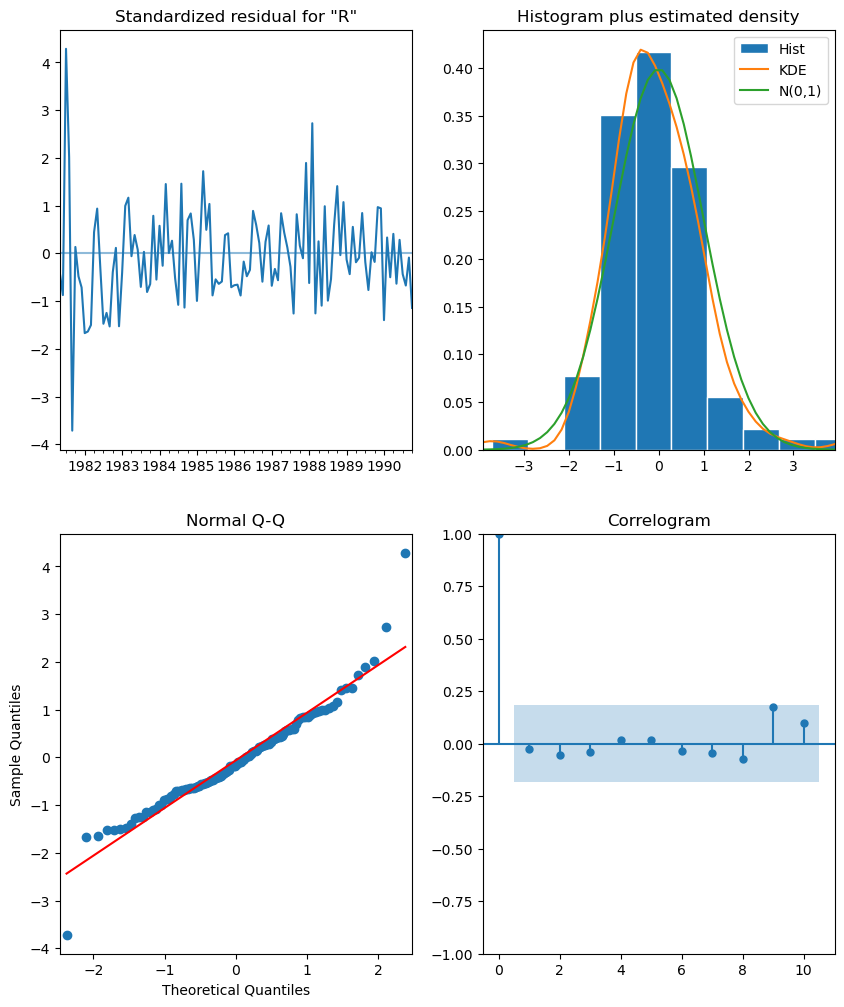

In [323]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(10,12))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [324]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [325]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Rose              mean    mean_se  mean_ci_lower  mean_ci_upper
1990-11-01   84.864367  18.805955      48.005373     121.723361
1990-12-01  111.969012  19.267713      74.204989     149.733035
1991-01-01   63.596378  19.372664      25.626653     101.566102
1991-02-01   67.384070  19.432197      29.297664     105.470476
1991-03-01   74.409874  19.437984      36.312126     112.507622

In [326]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

24.691004468038944


In [336]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto SARIMA(0,1,1)(2,0,2,6)'])


resultsstatDf = pd.concat([resultsstatDf,temp_resultsDf])

resultsstatDf

RMSE
Auto ARMA(0,1,2)                   3.864642e+01
Manual ARIMA(4,0,2)                3.756842e+01
Auto ARIMA(0,1,2)                  3.090380e+01
Manual SARIMA(4,0,2),(1, 1, 6, 6)  2.752732e+98
Auto SARIMA(0,1,1)(2,0,2,6)        2.565485e+01
Auto SARIMA(0,1,1)(2,0,2,6)        2.469100e+01
Auto SARIMA(0,1,1)(2,0,2,6)        2.811503e+01

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.



## Building the most optimum model on the Full Data.

In [337]:
full_data_model = sm.tsa.statespace.SARIMAX(df_1['Rose'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -731.652
Date:                           Fri, 09 Aug 2024   AIC                           1479.303
Time:                                   23:47:02   BIC                           1504.437
Sample:                               01-01-1980   HQIC                          1489.501
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5905      0.129     -4.583      0.000      -0.843      -0.338
ma.L1         -0.1369      0.136     -1.010

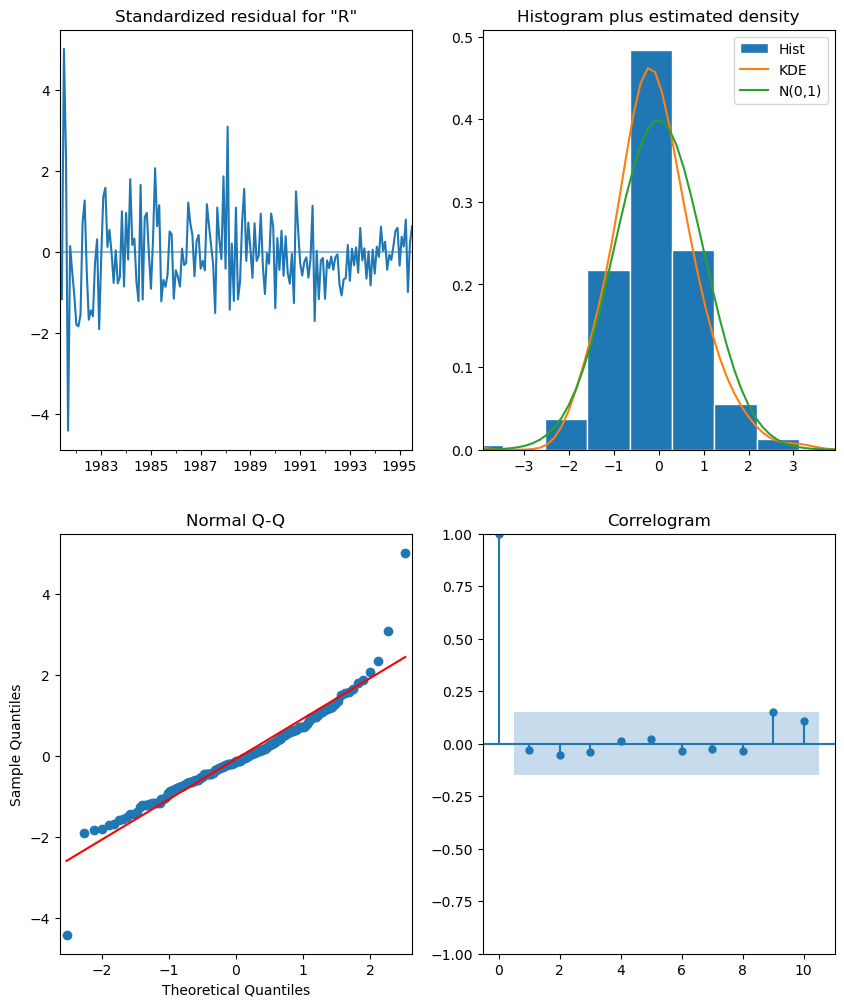

In [338]:
results_full_data_model.plot_diagnostics(figsize=(10,12));

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [339]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [340]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  48.667701  16.699071      15.938123      81.397279
1995-09-01  48.032696  17.307419      14.110779      81.954613
1995-10-01  50.941520  17.310771      17.013031      84.870008
1995-11-01  52.039222  17.496056      17.747582      86.330862
1995-12-01  70.317510  17.515525      35.987711     104.647309

In [341]:
rmse = mean_squared_error(df_1['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 26.259761188397725


In [342]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

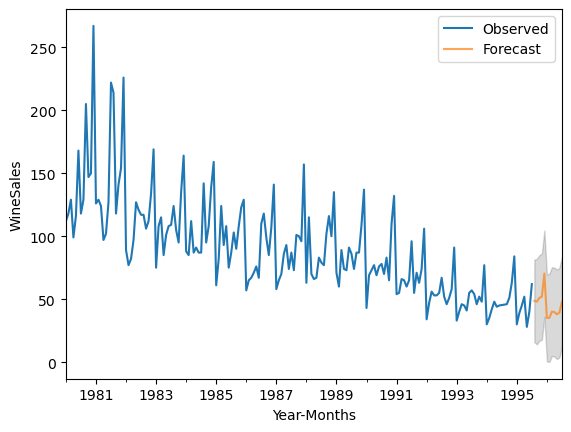

In [343]:
# plot the forecast along with the confidence band

axis = df_1['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()

In [344]:
resultsDf

RMSE
Manual SARIMA(4,0,2),(1, 1, 6, 6)  2.752732e+98

#### You can see how AR model improves using different techniques 